# 1. Explicación del DataSet

F5 Airlines lleva un tiempo recogiendo datos relativos a la satisfacción de los clientes.

Esta información está recogida en el archivo "airline_passenger_satisfaction.csv"

Estas son las variables recogidas en el estudio:

Gender: Gender of the passengers (Female, Male)

Customer Type: The customer type (Loyal customer, disloyal customer)

Age: The actual age of the passengers

Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)

Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)

Flight distance: The flight distance of this journey

Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)

Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient

Ease of Online booking: Satisfaction level of online booking

Gate location: Satisfaction level of Gate location

Food and drink: Satisfaction level of Food and drink

Online boarding: Satisfaction level of online boarding

Seat comfort: Satisfaction level of Seat comfort

Inflight entertainment: Satisfaction level of inflight entertainment

On-board service: Satisfaction level of On-board service

Leg room service: Satisfaction level of Leg room service

Baggage handling: Satisfaction level of baggage handling

Check-in service: Satisfaction level of Check-in service

Inflight service: Satisfaction level of inflight service

Cleanliness: Satisfaction level of Cleanliness

Departure Delay in Minutes: Minutes delayed when departure

Arrival Delay in Minutes: Minutes delayed when Arrival

Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)


# 2. Primeros pasos con el DataSet

In [152]:
# Importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
import scipy.stats

In [153]:
# Cargar los datos
file_path = "https://drive.google.com/uc?export=download&id=1oKFnhKBtO_-eEYenjplsVJAzbcAOYspq"
df = pd.read_csv(file_path)

In [154]:
print(f"Filas: {df.shape[0]}, Columnas: {df.shape[1]}")
df.head()

Filas: 103904, Columnas: 25


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [155]:
# Variables categóricas y numéricas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

# 3. Limpieza

- Datos faltantes.

- Columnas irrelevantes (que no corresponden al problema que queremos resolver).

- Registros (filas) repetidos.

- Valores extremos (outliers) en el caso de variables numéricas. Se deben analizar en detalle, para saber si lo eliminamos o no.

- Errores tipográficos en el caso de variables categóricas.


**3.1. Datos faltantes.**

Analizando los datos del dataset observamos algunos datos incompletos, ya que una de las columnas no tiene la misma cantidad de registros que las demás.

El número total de registros debería ser 103904. Sin embargo, la columna de "Arrival Delay in Minutes", solo tiene 103594.


Ya que hay algunos valores faltantes en las variables numéricas y categóricas, utilizamos KNNImputer para las variables numéricas y la moda para las variables categóricas.


In [156]:
# Limpieza y preparación de datos
print("Valores nulos antes de la imputación:")
print(df.isnull().sum())

# Manejo de valores nulos usando KNNImputer para variables numéricas
cols_num = ["Age", "Flight Distance", "Departure Delay in Minutes",	"Arrival Delay in Minutes"]

imputer = KNNImputer(n_neighbors=5)
df[cols_num] = imputer.fit_transform(df[cols_num])

# Para variables categóricas, rellenamos con la moda
cols_cat = ["Gender", "Customer Type", "Type of Travel", "Class", "Inflight wifi service",	"Departure/Arrival time convenient",	"Ease of Online booking",	"Gate location",	"Food and drink",	"Online boarding",	"Seat comfort",	"Inflight entertainment",	"On-board service",	"Leg room service",	"Baggage handling",	"Checkin service",	"Inflight service",	"Cleanliness", "satisfaction"]

for column in cols_cat:
    mode_value = df[column].mode()[0]
    df[column] = df[column].fillna(mode_value)

print("Valores nulos después de la imputación:")
print(df.isnull().sum())


Valores nulos antes de la imputación:
Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Mi

**3.2. Columnas irrelevantes.**

- Una columna que no contiene información relevante para el problema que queremos resolver.
- Una columna categórica pero con un sólo nivel. Por ejemplo si en la columna "Type of travel" solo tuviésemos el nivel "unknown".
- Una columna numérica pero con un sólo valor.
-  Columnas con información redundante.

In [157]:
# Verificamos los niveles en las columnas categóricas

for col in cols_cat:
    print(f"Columna {col}: {df[col].nunique()} subniveles")

Columna Gender: 2 subniveles
Columna Customer Type: 2 subniveles
Columna Type of Travel: 2 subniveles
Columna Class: 3 subniveles
Columna Inflight wifi service: 6 subniveles
Columna Departure/Arrival time convenient: 6 subniveles
Columna Ease of Online booking: 6 subniveles
Columna Gate location: 6 subniveles
Columna Food and drink: 6 subniveles
Columna Online boarding: 6 subniveles
Columna Seat comfort: 6 subniveles
Columna Inflight entertainment: 6 subniveles
Columna On-board service: 6 subniveles
Columna Leg room service: 6 subniveles
Columna Baggage handling: 5 subniveles
Columna Checkin service: 6 subniveles
Columna Inflight service: 6 subniveles
Columna Cleanliness: 6 subniveles
Columna satisfaction: 2 subniveles


Como todas las columnas categóricas tienen más de un nivel, no eliminamos ninguna.

Ahora comprobamos las columnas numéricas. Si la desviación estándar no es exactamente 0, quiere decir que esa columna tiene más de un valor.

In [158]:
df.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.239850
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.792132
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


Observamos la desviación estándar y vemos que todas las columnas numéricas tienen la "std" diferente de 0, lo que ndica que tienen un único valor. Así que conservamos todas.

**3.3. Filas repetidas.**

In [159]:
print(f"Filas duplicadas: {df.duplicated().sum()}")

Filas duplicadas: 0


**3.4. Outliers en las variables numéricas.**

No siempre se deben eliminar los outliers porque dependiendo de la variable numérica analizada, pueden contener información importante.

Vamos a crear gráficas tipo "boxpolt" de las columnas numéricas:

In [ ]:
# Generamos gráficas individuales para las variables numéricas

fig, ax = plt.subplots(nrows=len(cols_num), ncols=1, figsize=(15,20))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(cols_num):
    sns.boxplot(data=df, x=col, ax=ax[i])
    ax[i].set_title(col)

plt.show()

**Observaciones:**

- Flight distance: hay valores de distancia de vuelo superiores a 4000, pero podemos suponer que es posible en la aerolinea, aunque son pocos los valores.
- Departure Delay in Minutes y Arrival Delay in Minutes: tienen valores de retraso de mas de 600 minutos, lo que equivaldría a más de 10 horas. Si tenemos en cuenta que un vuelo nocturno se retraso de manera que tenga que salir al día siguiente, o que varias vuelos con escala se podrian retrasar varias horas, estos valores podrían ser reales.

Para entender mejor estos outliers, vamos a filtrar las filas en las que el retraso del vuelo ha sido superior a 800 minutos, para ver si se trata de vuelos de larga duración. Observamos que efectivamente está relacionados, por lo que pueden ser datos ciertos.

In [181]:
# Filtra las filas donde 'Departure Delay in Minutes' es mayor a 800
delay_departure = df[df['Departure Delay in Minutes'] > 800][['id', 'Flight Distance', 'Departure Delay in Minutes']]
print(delay_departure)

# Filtra las filas donde 'Arrival Delay in Minutes' es mayor a 800
delay_arrival = df[df['Arrival Delay in Minutes'] > 800][['id', 'Flight Distance', 'Arrival Delay in Minutes']]
print(delay_arrival)

# Observamos que estos retrasos están relacionados con vuelos de larga distancia, por lo que no se eliminarán.

          id  Flight Distance  Departure Delay in Minutes
6744   69661           2916.0                      1305.0
27732  69504           1746.0                       859.0
51860  79912           3979.0                       853.0
61287   4376           2418.0                       930.0
61310   4903           1959.0                      1017.0
61528  83676            577.0                       921.0
72206  78300           1598.0                       978.0
80182   8345           2187.0                       933.0
83741  73471           1120.0                      1592.0
          id  Flight Distance  Arrival Delay in Minutes
6744   69661           2916.0                    1280.0
27732  69504           1746.0                     860.0
51860  79912           3979.0                     823.0
61287   4376           2418.0                     952.0
61310   4903           1959.0                    1011.0
61528  83676            577.0                     924.0
72206  78300           1598.

**3.4. Errores tipográficos en variables categóricas.

<ipython-input-162-46764b37ab85>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45) # Rotate x-axis labels if needed


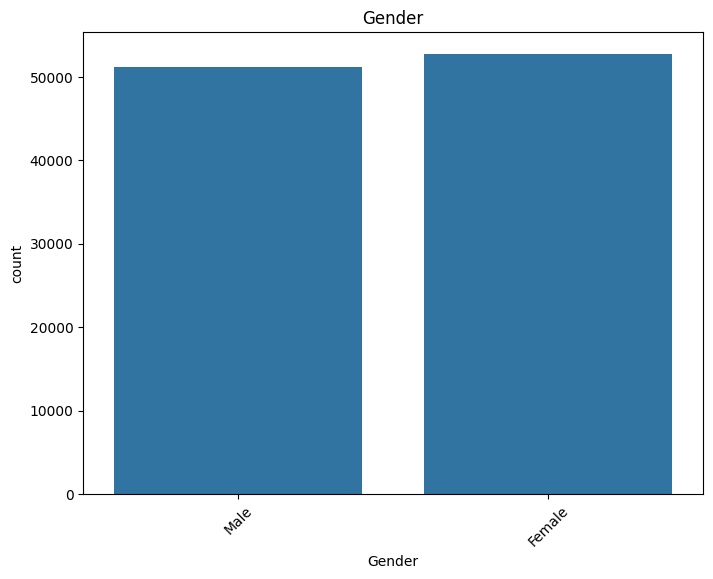

<ipython-input-162-46764b37ab85>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45) # Rotate x-axis labels if needed


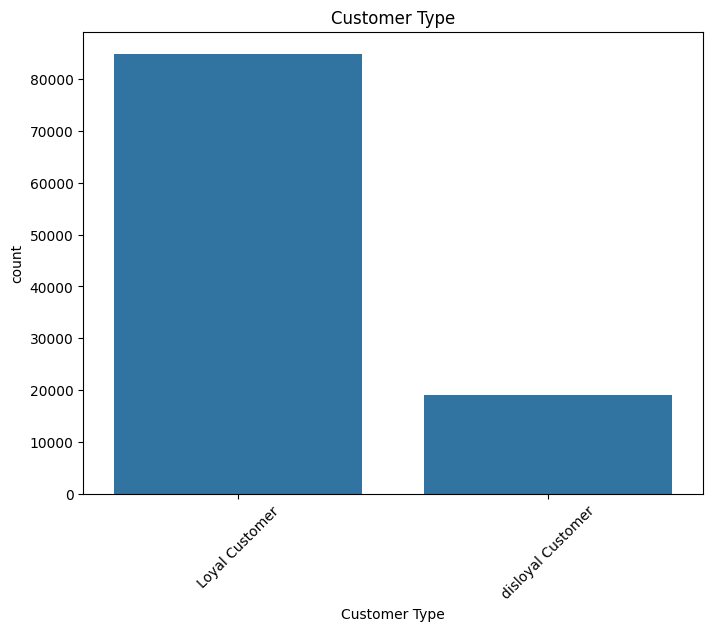

<ipython-input-162-46764b37ab85>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45) # Rotate x-axis labels if needed


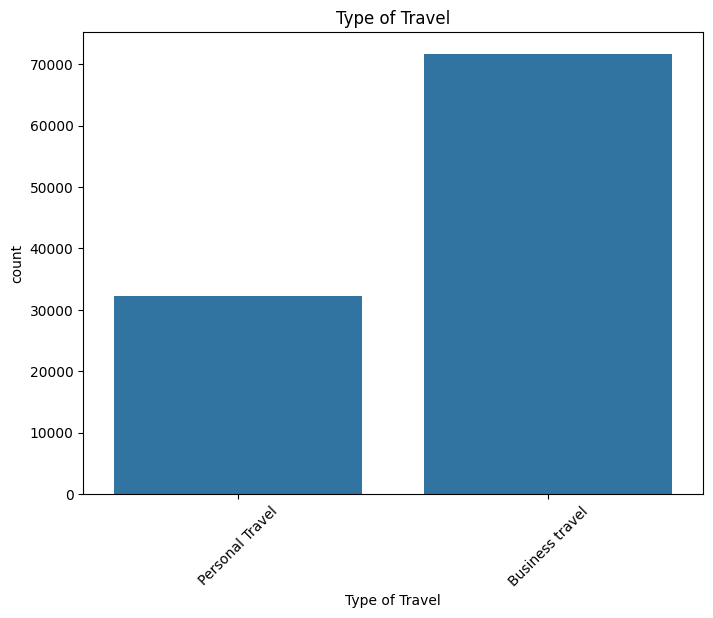

<ipython-input-162-46764b37ab85>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45) # Rotate x-axis labels if needed


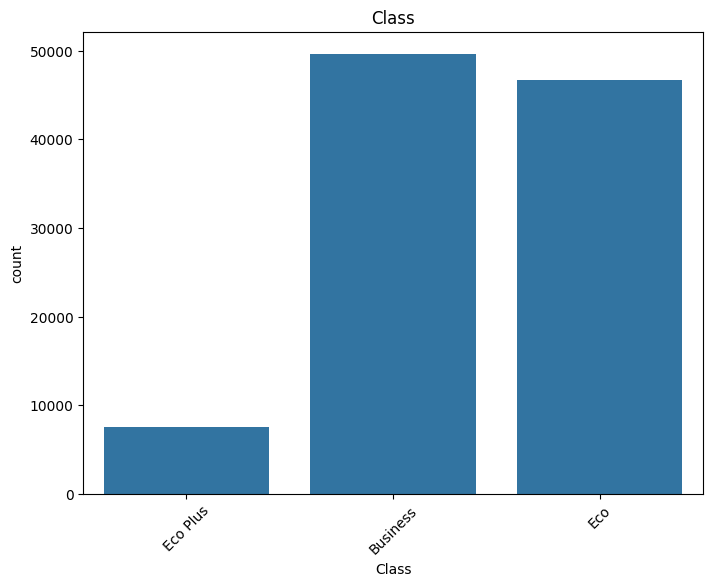

<ipython-input-162-46764b37ab85>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45) # Rotate x-axis labels if needed


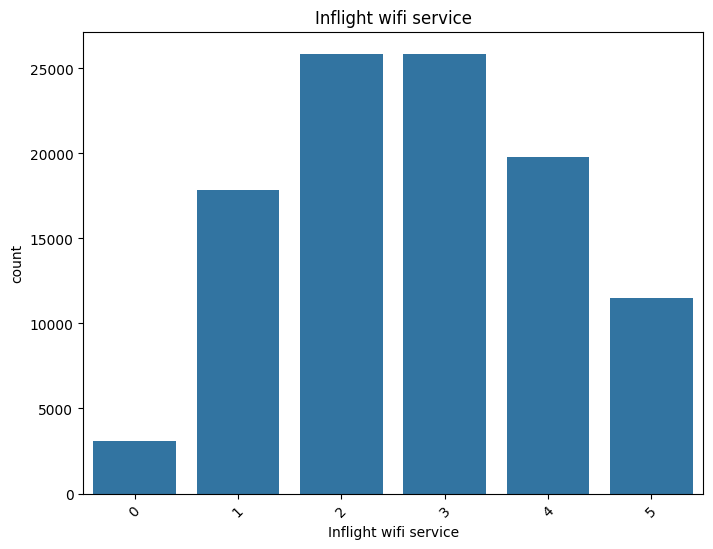

<ipython-input-162-46764b37ab85>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45) # Rotate x-axis labels if needed


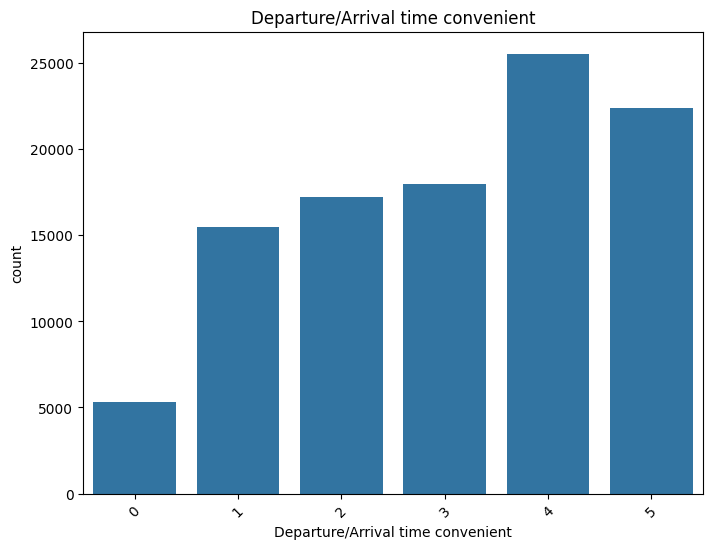

<ipython-input-162-46764b37ab85>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45) # Rotate x-axis labels if needed


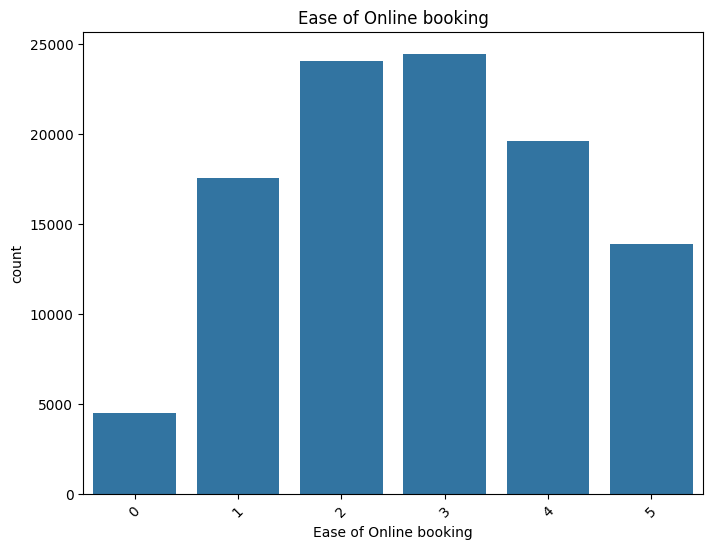

<ipython-input-162-46764b37ab85>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45) # Rotate x-axis labels if needed


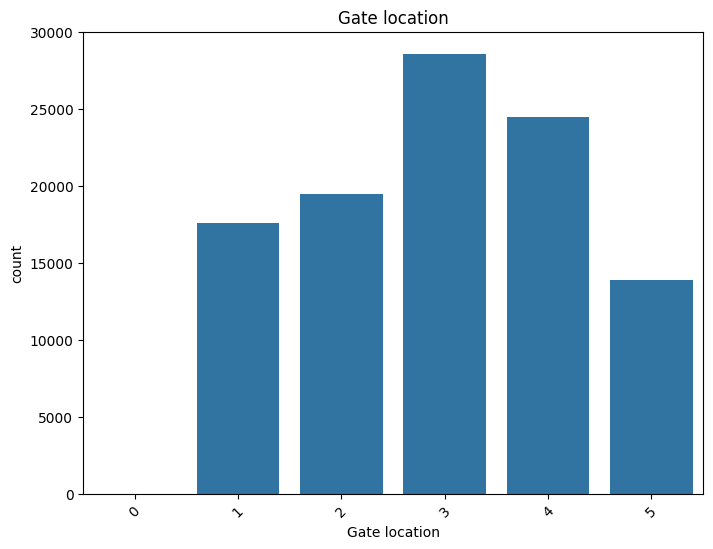

<ipython-input-162-46764b37ab85>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45) # Rotate x-axis labels if needed


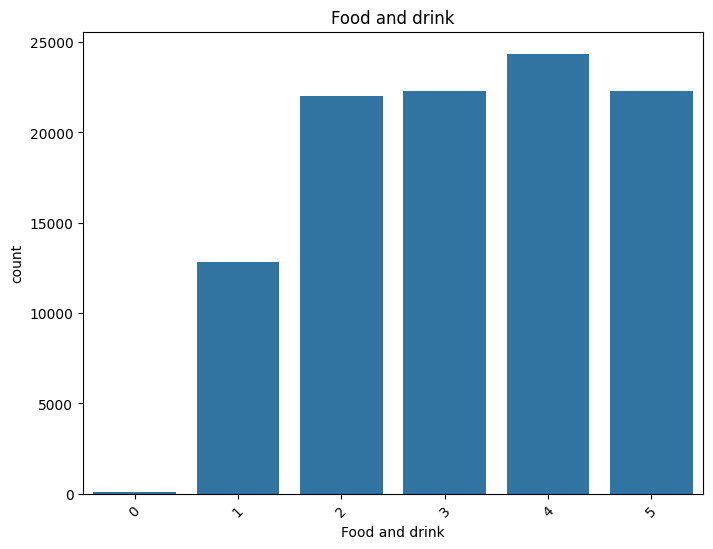

<ipython-input-162-46764b37ab85>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45) # Rotate x-axis labels if needed


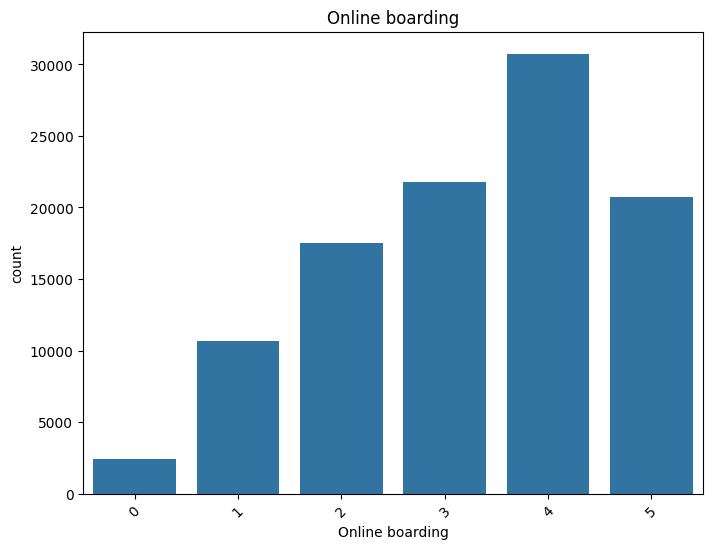

<ipython-input-162-46764b37ab85>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45) # Rotate x-axis labels if needed


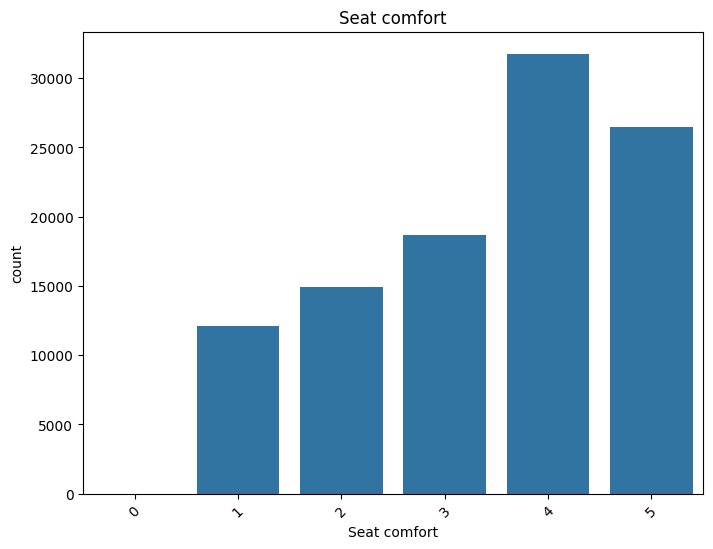

<ipython-input-162-46764b37ab85>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45) # Rotate x-axis labels if needed


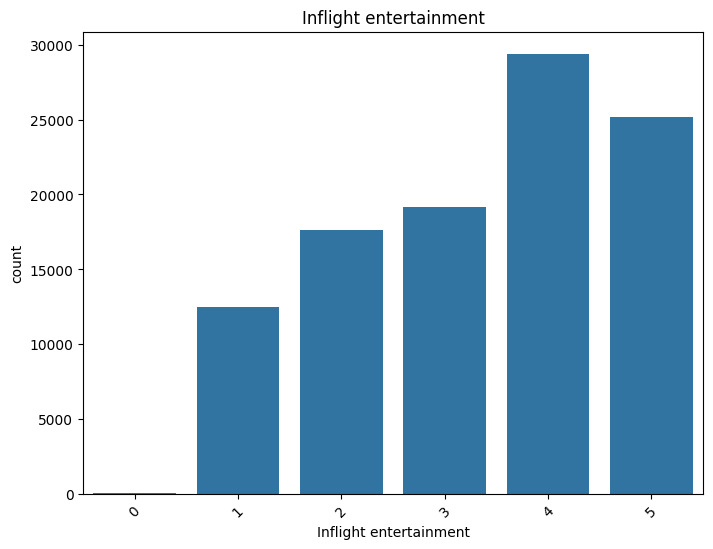

<ipython-input-162-46764b37ab85>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45) # Rotate x-axis labels if needed


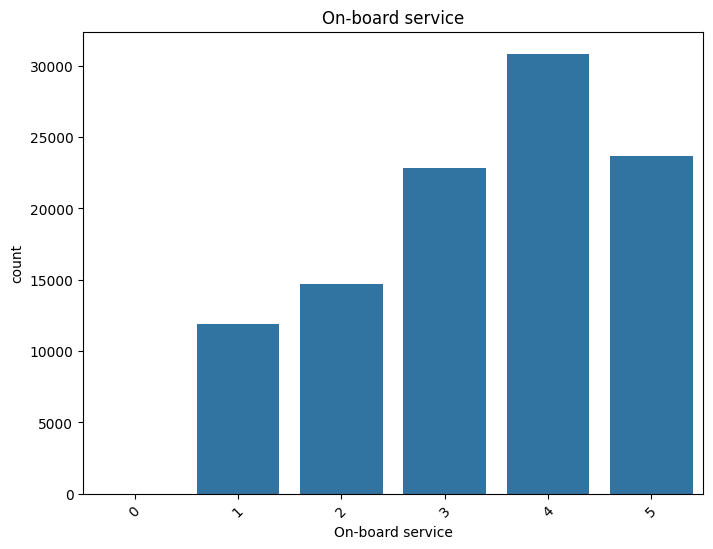

<ipython-input-162-46764b37ab85>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45) # Rotate x-axis labels if needed


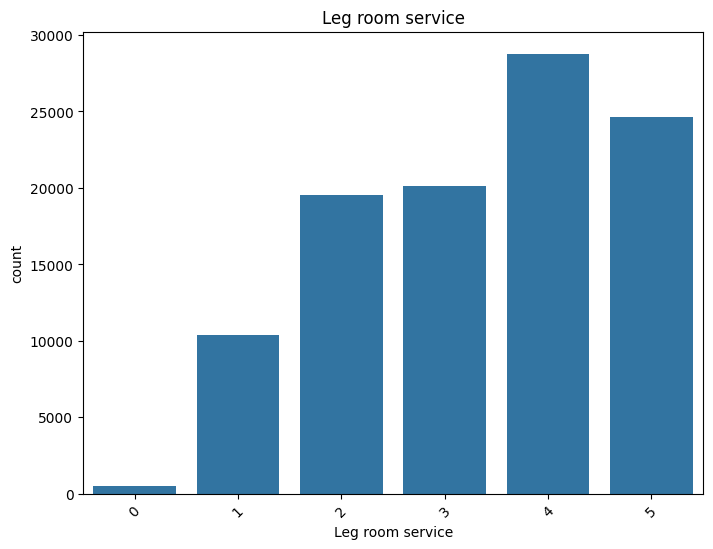

<ipython-input-162-46764b37ab85>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45) # Rotate x-axis labels if needed


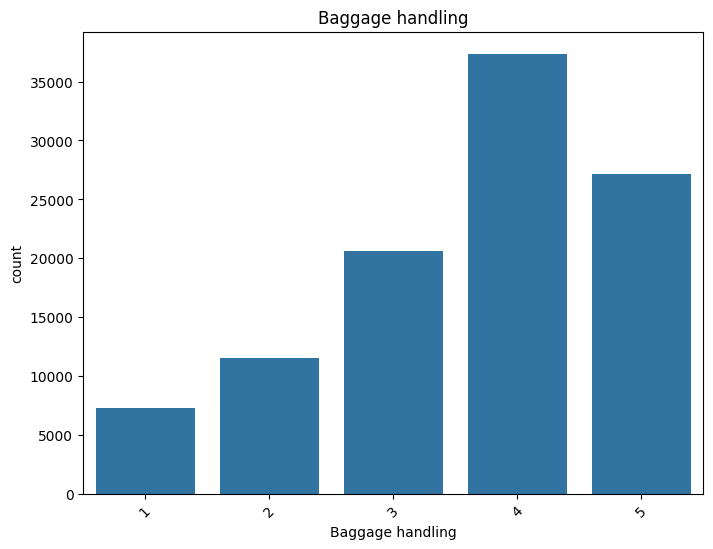

<ipython-input-162-46764b37ab85>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45) # Rotate x-axis labels if needed


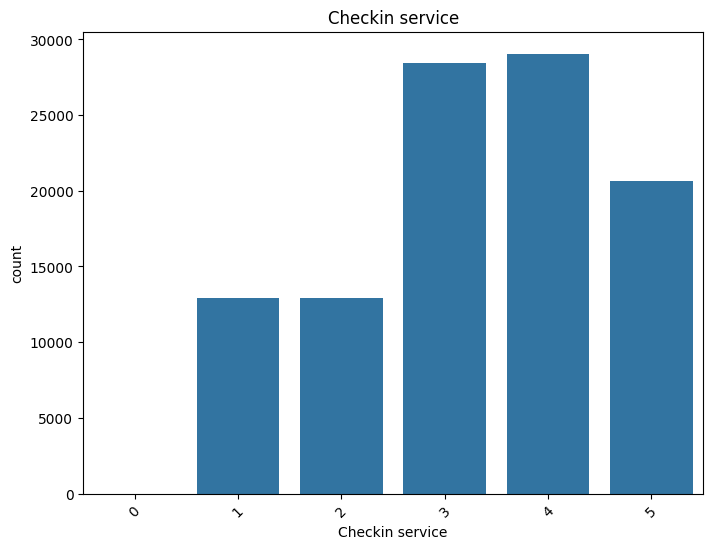

<ipython-input-162-46764b37ab85>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45) # Rotate x-axis labels if needed


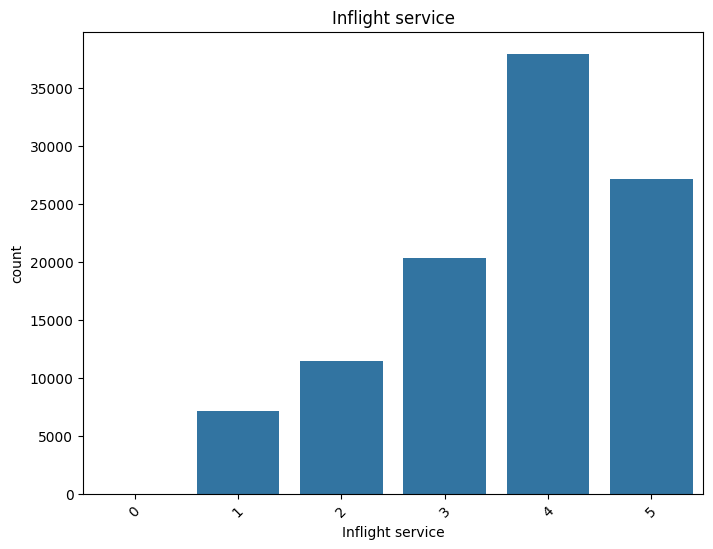

<ipython-input-162-46764b37ab85>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45) # Rotate x-axis labels if needed


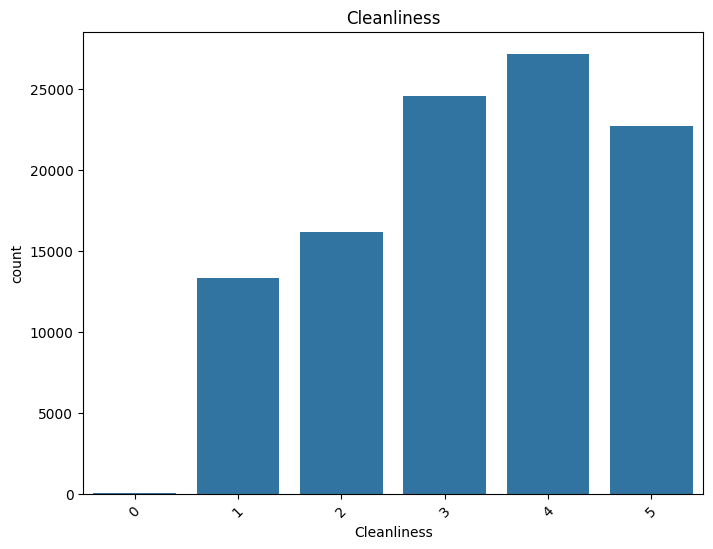

<ipython-input-162-46764b37ab85>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45) # Rotate x-axis labels if needed


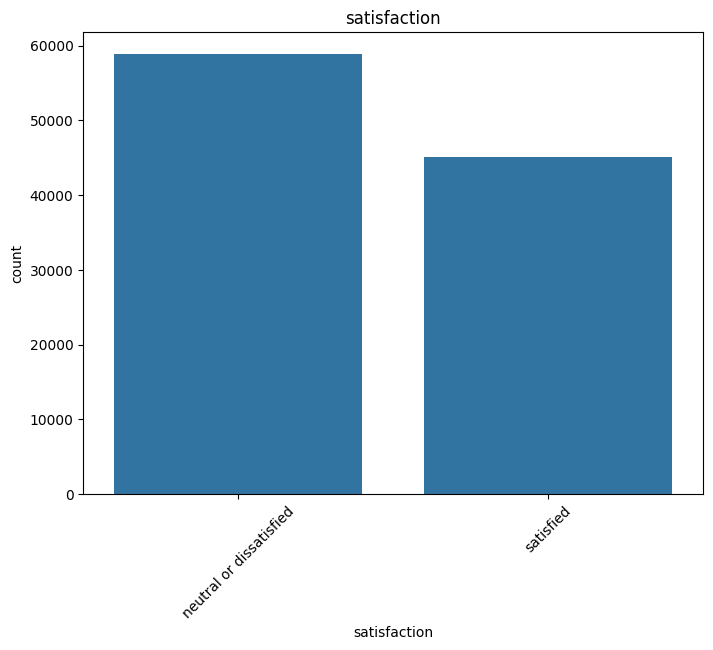

In [162]:
# Graficamos los subniveles de cada variable categórica

cols_cat = ["Gender", "Customer Type", "Type of Travel", "Class", "Inflight wifi service",	"Departure/Arrival time convenient",	"Ease of Online booking",	"Gate location",	"Food and drink",	"Online boarding",	"Seat comfort",	"Inflight entertainment",	"On-board service",	"Leg room service",	"Baggage handling",	"Checkin service",	"Inflight service",	"Cleanliness", "satisfaction"]

for i, col in enumerate(cols_cat):
    fig, ax = plt.subplots(figsize=(8, 6)) # Adjust figsize as needed
    sns.countplot(data=df, x=col, ax=ax)
    ax.set_title(col)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45) # Rotate x-axis labels if needed
    plt.show()

Con esto observamos que no hay ningún error tipográfico en los datos.

# 4. Análisis exploratorio.

La idea es usar herramientas estadísticas y de visualización para:
- Crear un mapa mental del set de datos.
- Empezar a encontrar respuestas a la pregunta planteada inicialmente.

Llevaremos a cabo estas fases:
1. Análisis de cada variable de manera individual.
2. Análisis univariado: relación de cada variable predictora con la variable a predecir.
3. Análisis bivariado: relación de pares de variables predictoras con la variable a predecir.

Analizando los subniveles de las variables categóricas con los gráficos del apartado anterior, podemos sacar las siguientes observaciones:

- "Gender": está bastante igualado la cantidad de hombres y mujeres, aunque es mayor el número de mujeres.
- "Customer Type": "loyal customer" y "disloyal customer". En este caso la gran mayoría pertenecen al nivel "loyal customer".
- "Type of Travel": "Personal Travel" y "Business Travel". La gran mayoría pertenecen al subnivel Business.
- "Class": "Eco plus, "Business" y "Eco". L amayoría pertencen a "Business" y "Eco".
- "Inflight wifi service", "Ease of Online booking" y
"Gate location" están repartidos uniformemente sobre la mitad de la gráfica, por lo que la opinión tiene a ser neutral. Mayor inluencia en el 3, y seguidamente 2 o 4.
-	"Departure/Arrival time convenient",	"Ease of Online booking", "Gate location",	"Food and drink",	"Online boarding",	"Seat comfort",	"Inflight entertainment",	"On-board service",	"Leg room service",	"Baggage handling",	"Checkin service",	"Inflight service",	"Cleanliness": tienen la gran mayoría de valoraciones entre 3 y 5, en su mayor parte en el 4. Por lo que en su gran mayoría es mayor la satisfacción.
- "Satisfaction": Esta es la variable que queremos predecir con nuestro modelo de Machine Learning. Se divide en "Neutral o dissatisfied" y "Satisfied". Esta bastante igualado, pero es mayor en el nivel de "Neutral o dissatisfied".

**ELIMINACION DE COLUMNAS NO RELEVANTES**

<ipython-input-163-fd73dd5437a3>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45)
<ipython-input-163-fd73dd5437a3>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45)


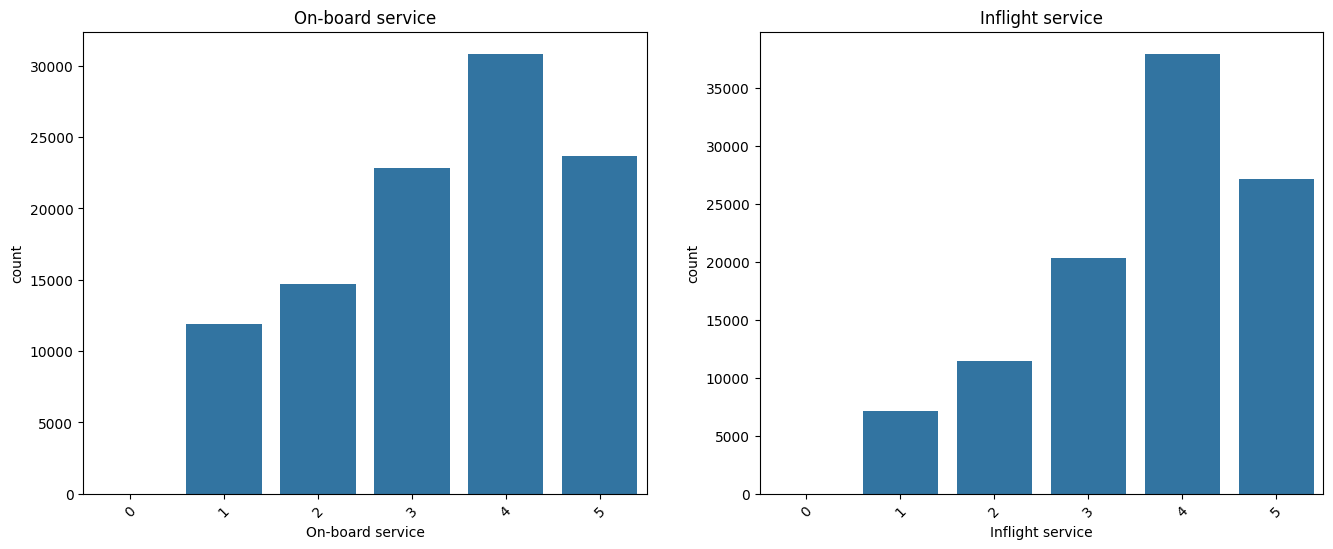

In [163]:
fig, ax = plt.subplots(ncols=2, figsize=(16, 6))

sns.countplot(data=df, x="On-board service", ax=ax[0])
ax[0].set_title("On-board service")
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45)

sns.countplot(data=df, x="Inflight service", ax=ax[1])
ax[1].set_title("Inflight service")
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45)

plt.show()

Analizamos estas dos columnas al ser similares, para ver la posibilidad de quedarnos con una sola variable. Dados los datos, no podemos eliminarla.

Vamos a dibujar histogramas con las variables numéricas, para asi analizarlas más en detalle.

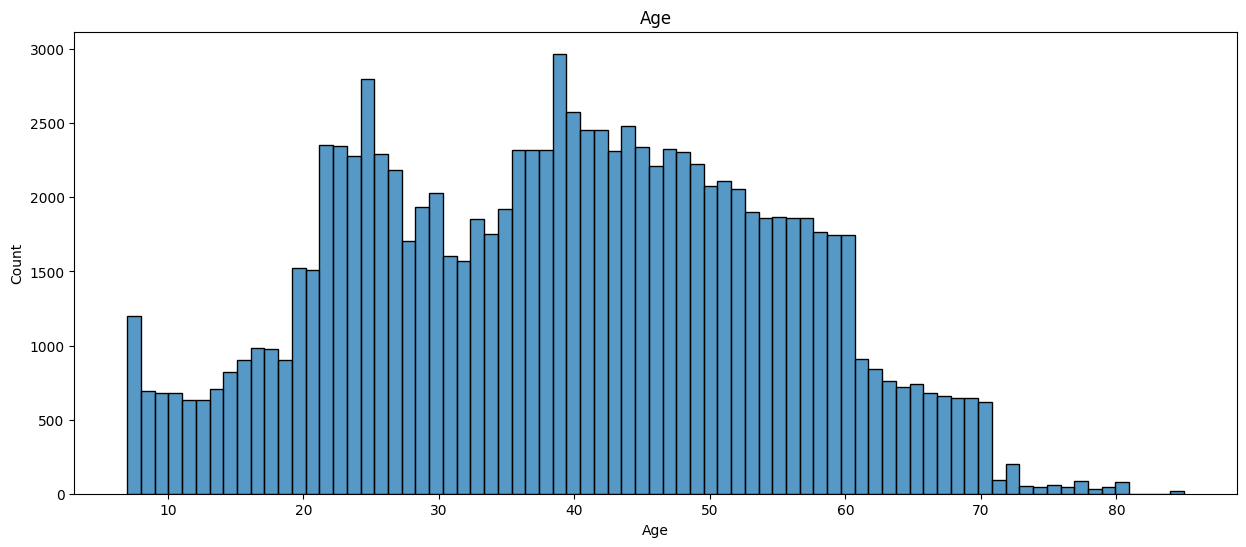

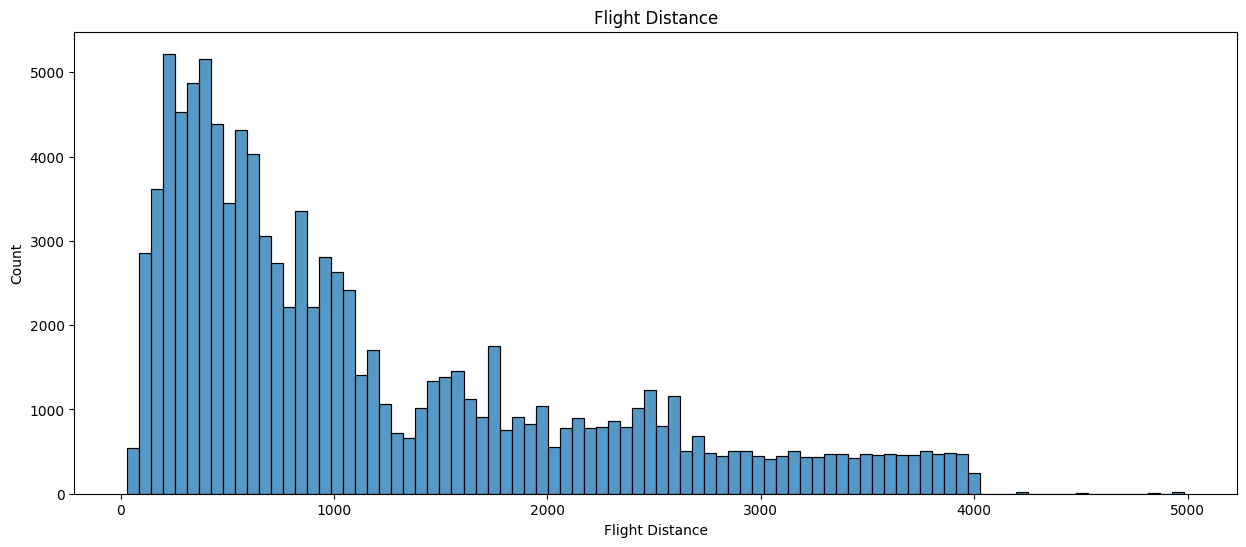

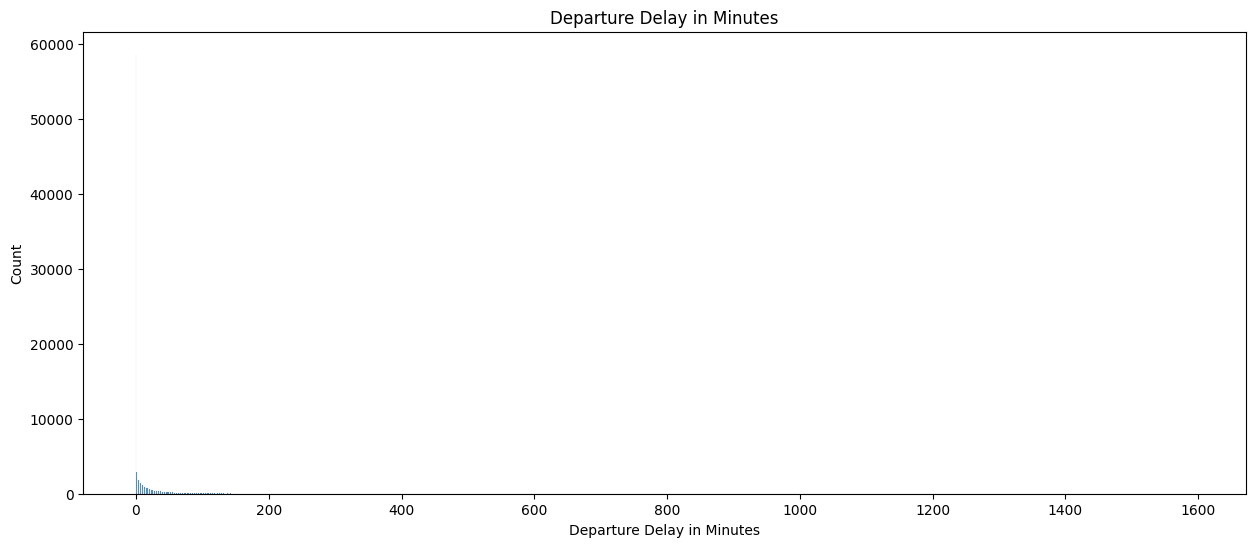

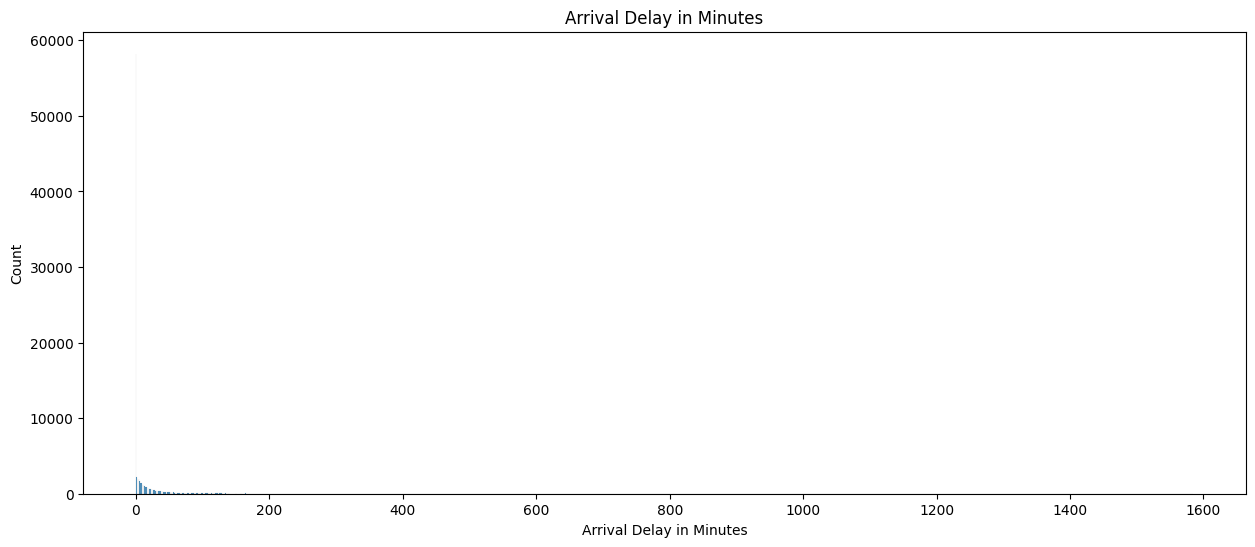

In [164]:
for i, col in enumerate(cols_num):
  fig, ax = plt.subplots(figsize=(15, 6))
  sns.histplot(data=df, x=col, ax=ax)
  ax.set_title(col)
  plt.show()

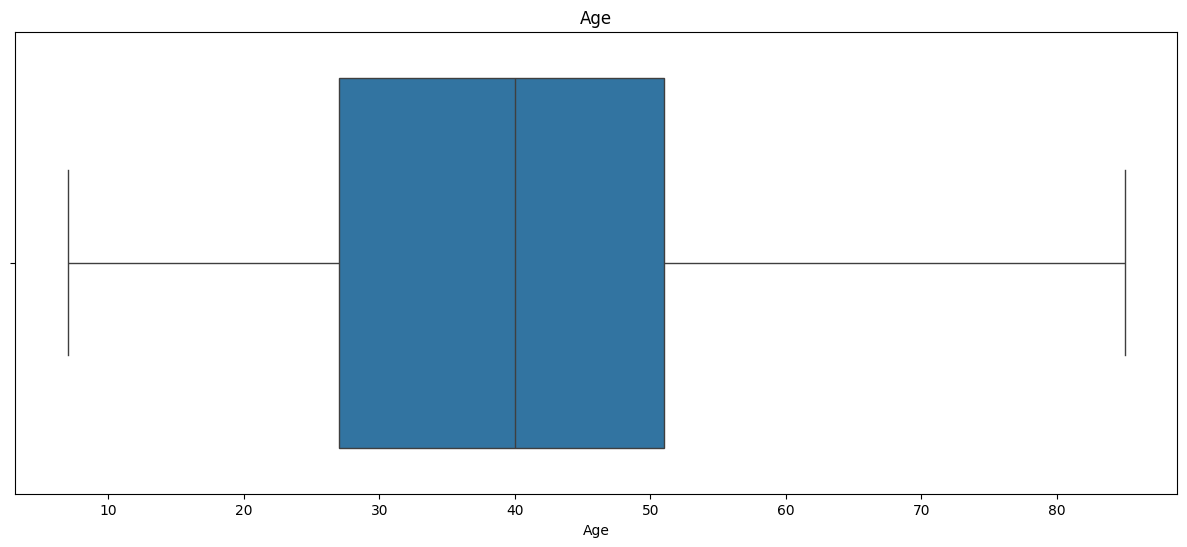

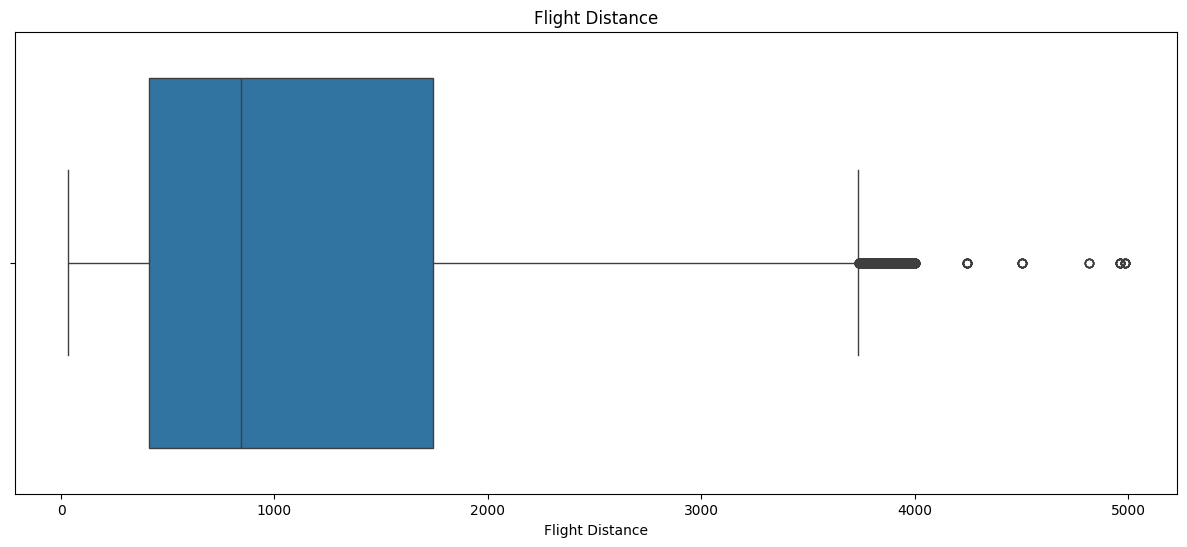

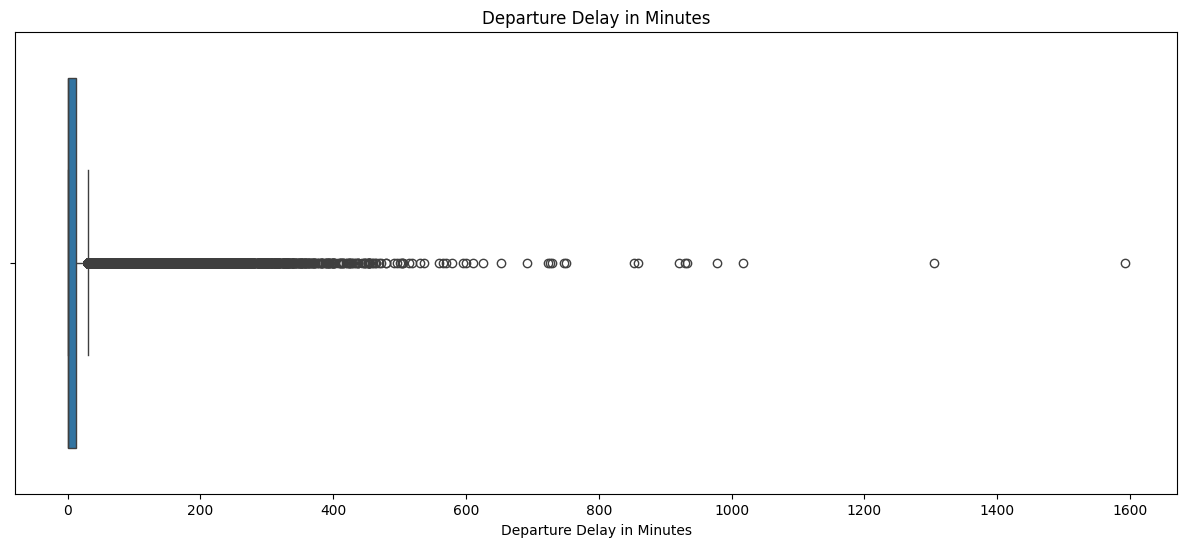

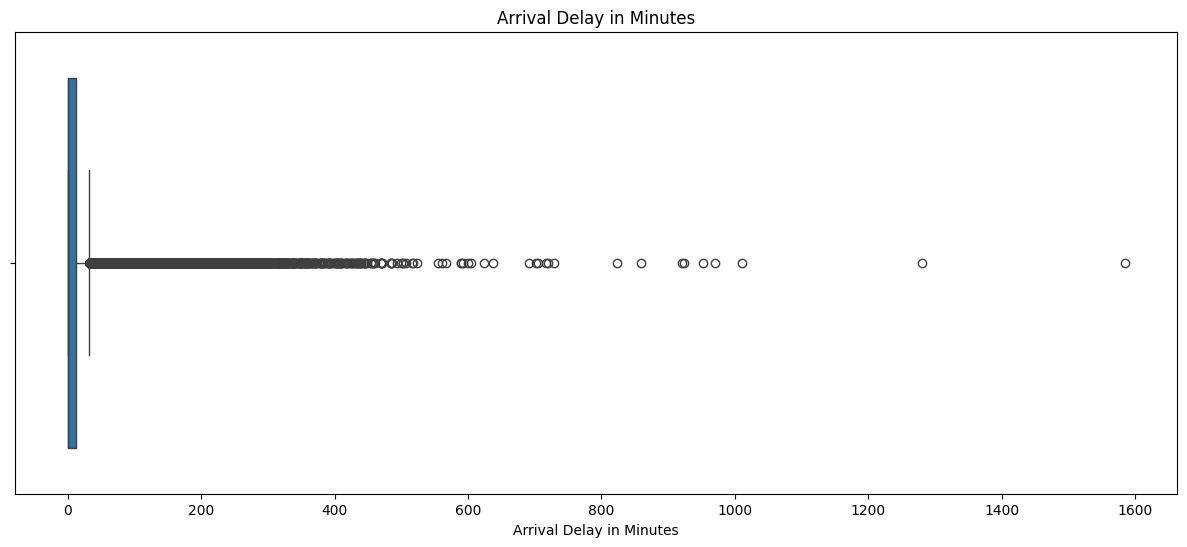

In [165]:
for i, col in enumerate(cols_num):
    fig, ax = plt.subplots(figsize=(15, 6))
    sns.boxplot(data=df, x=col, ax=ax)
    ax.set_title(col)
    plt.show()

Utilizamos un gráfico en violín para poder visualizar mejor los valores de delay.

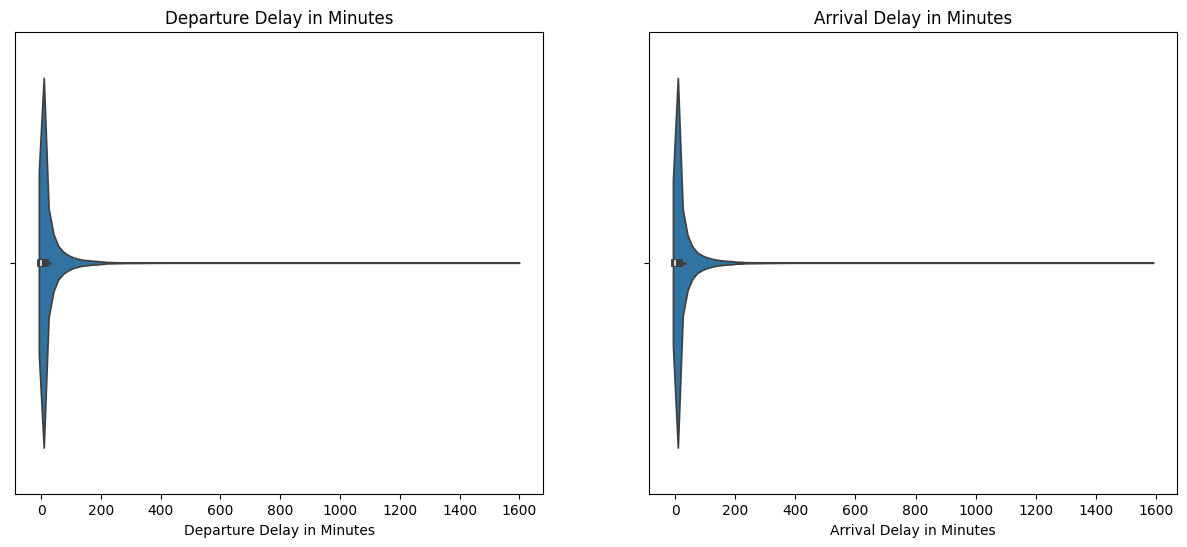

In [166]:
fig, ax = plt.subplots(ncols=2, figsize=(15, 6))

sns.violinplot(data=df, x='Departure Delay in Minutes', ax=ax[0])
ax[0].set_title('Departure Delay in Minutes')

sns.violinplot(data=df, x='Arrival Delay in Minutes', ax=ax[1])
ax[1].set_title('Arrival Delay in Minutes')

plt.show()

In [167]:
df['Departure Delay in Minutes'].describe()

,Departure Delay in Minutes
count,103904.000000
mean,14.815618
std,38.230901
min,0.000000
25%,0.000000
50%,0.000000
75%,12.000000
max,1592.000000


In [168]:
df['Arrival Delay in Minutes'].describe()

,Arrival Delay in Minutes
count,103904.000000
mean,15.239850
std,38.792132
min,0.000000
25%,0.000000
50%,0.000000
75%,13.000000
max,1584.000000


**Observaciones:**

- La mayor parte de nuestro conjunto de datos esta entre los 25 y 50 años.
- La gran mayoría de vuelos son los de distancia entre 200 y 1800 km. Con un sesgo hacia los 700 km o menos.
- Los valores de delay están comprendidos la gran mayoría entre 0 y 50 min. La media aritmética es de 14-15 min, y el 75% (Q3) esta en 13 min o menos.

4.1 Análisis univariado.

Vamos a calcular la tasa de satisfacción:

In [169]:
df.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.239850
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.792132
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [170]:
# Representamos la variable de forma binaria
dic = {'neutral or dissatisfied': 0, 'satisfied': 1}
binary = df['satisfaction'].map(dic)
df['satisfaction_bin'] = binary

# Así es más fácil calcular la tasa de satisfacción: el promedio

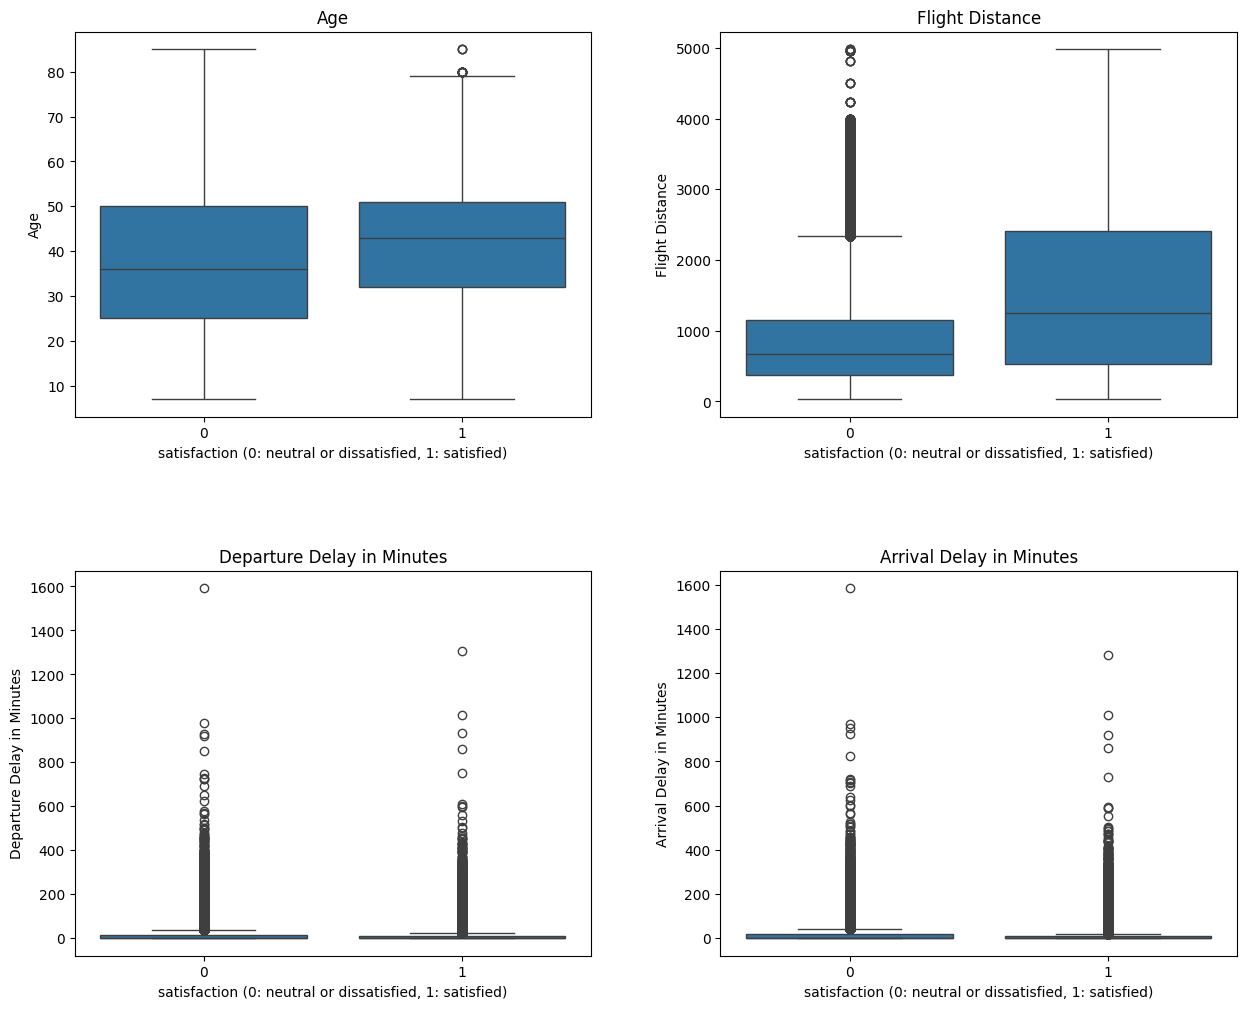

In [171]:
# Analizamos la relación entre las variables numéricas y la variable a predecir "satisfaction"

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 12)) # Ahora tenemos 2 filas y 2 columnas
fig.subplots_adjust(wspace=.25, hspace=.4) # Ajustamos el espacio entre los subplots

for i, col in enumerate(cols_num):
    row = i // 2  # Calculamos la fila para el subplot
    col_num = i % 2  # Calculamos la columna para el subplot
    bplt = sns.boxplot(data=df, x='satisfaction_bin', y=col, ax=ax[row, col_num])
    ax[row, col_num].set_xlabel('satisfaction (0: neutral or dissatisfied, 1: satisfied)')
    ax[row, col_num].set_title(col)

plt.show()

En la variable "Age" no hay diferencias muy significativas, y ambas tienen una gran dispersión.
En la variable "Flight distance, si tenemos un diferencia significativa, los valores de satisfechos tienen un mayor dispersión, y se encuentran desde los 0 a los 5000 km, teniendo la media sobre los 1200 km, mientras que los insatisfechos o neutrales, van de 0 a 2400 km aprox., y su media está en torno a los 700 km. Con esto lo que podemos observar es que con distancias más largas, la satisfacción es mayor.
En las variables que indican el "Delay in minutes", los gráficos son bastante similares en valores y dispersión, por lo que no podriamos decir que marquen la diferencia a la hora de predecir el resultado.

In [172]:
def graficar_tasa_satisfaccion(var_predictora, var_predecir, type='line', order=None):
  x, y = var_predecir

  # Generar agrupaciones, calcular tasa de satisfacción (mean)
  # multiplicarla por 100
  grupo = df.groupby(x)[y].mean().mul(100).rename('tasa_satisfaccion').reset_index() # Use .mul() to multiply a Series by a scalar

  # Generamos gráfica
  if type == 'line': # Útil para rangos continuos
    fig, ax = plt.subplots(figsize=(15, 6))
    sns.lineplot(x=var_predictora, y='tasa_satisfaccion', data=grupo)
    plt.grid()
  elif type == 'bar': # Útil para los rangos que están divididos en rangos o son categóricos
    fig, ax = plt.subplots(figsize=(15, 6))
    sns.barplot(x=var_predictora, y='tasa_satisfaccion', data=grupo)
    plt.grid()
  elif type == 'scatter': # Útil para los rangos que están divididos en rangos o son categóricos
    fig, ax = plt.subplots(figsize=(15, 6))
    sns.scatterplot(x=var_predictora, y='tasa_satisfaccion', data=grupo)
    plt.grid()

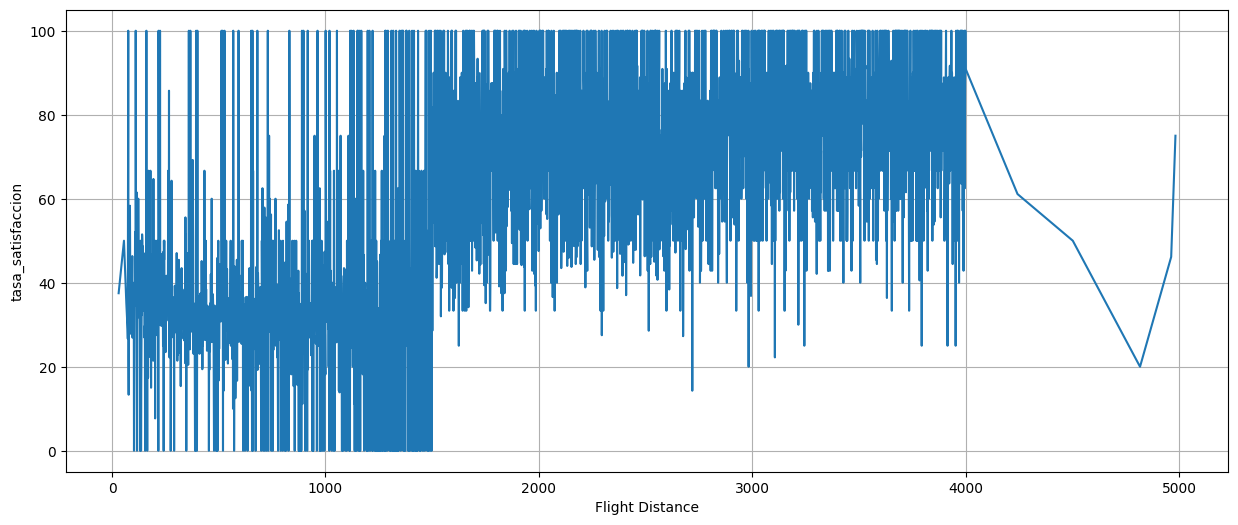

In [173]:
# Graficamos las tasas de satisfacción para la variable "Flight Distance"
graficar_tasa_satisfaccion('Flight Distance', ('Flight Distance', 'satisfaction_bin'))

Podemos observar tres tipos de grupos con diferentes tasa de coversión: 0 - 1500 km, 1500 - 4000 km y 4000 - 5000 km.

Vamos a diferenciarlos para analizarlos más en detalle.

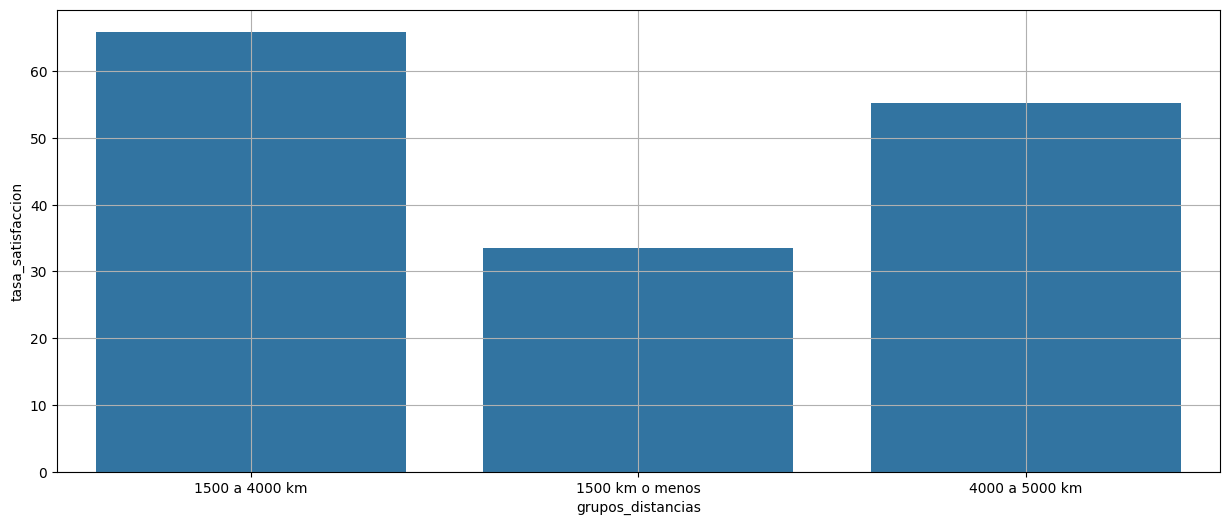

In [174]:
# Creamos subgrupos de distancias y calculamos las tasas en cada subgrupo
# Creamos una nueva columna: grupos_distancias

df.loc[:, 'grupos_distancias'] = "1500 km o menos"
df.loc[df['Flight Distance'] > 1500, 'grupos_distancias'] = "1500 a 4000 km"
df.loc[df['Flight Distance'] > 4000, 'grupos_distancias'] = "4000 a 5000 km"

# Graficamos la tasa de satisfacción para la nueva columna
graficar_tasa_satisfaccion('grupos_distancias', ('grupos_distancias', 'satisfaction_bin'), type='bar')

Podemos ver que a menor distancia de vuelo, menor tasa de satisfacción, que los mejores valores se encuentran entre los 1500 - 4000 km.
Tasas de satisfacción:
0 - 15000 km --> 33%
1500 - 4000 km --> 65%
4000 - 5000 km --> 55%

Ahora vamos a analizar las variables categóricas.

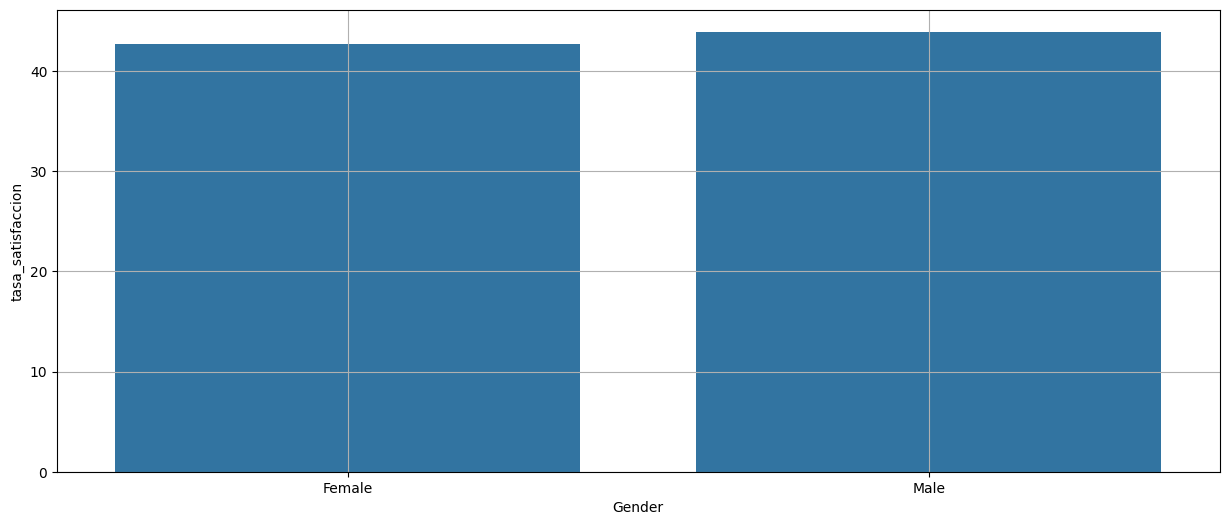

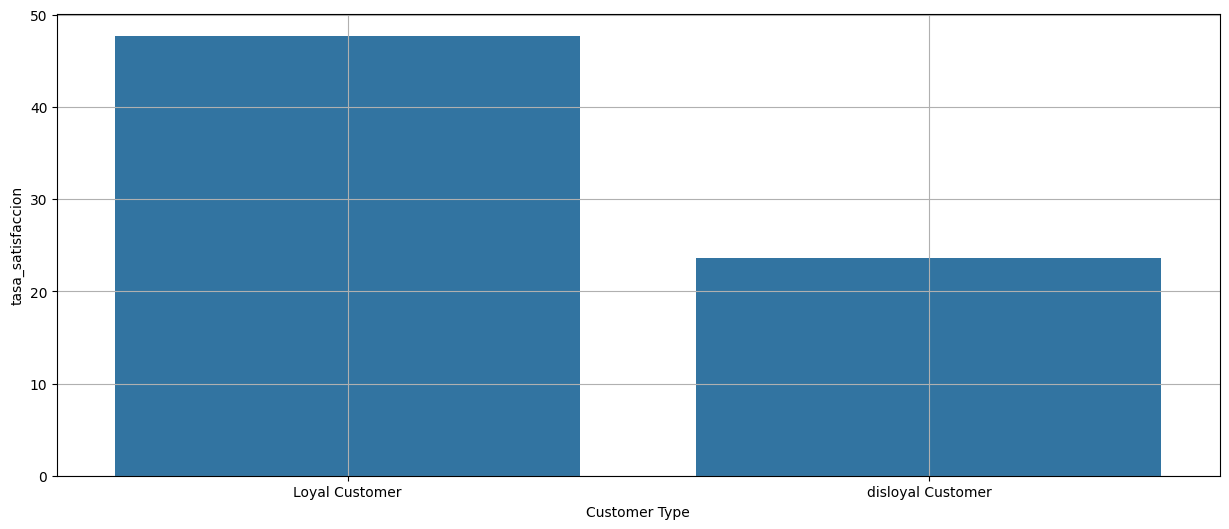

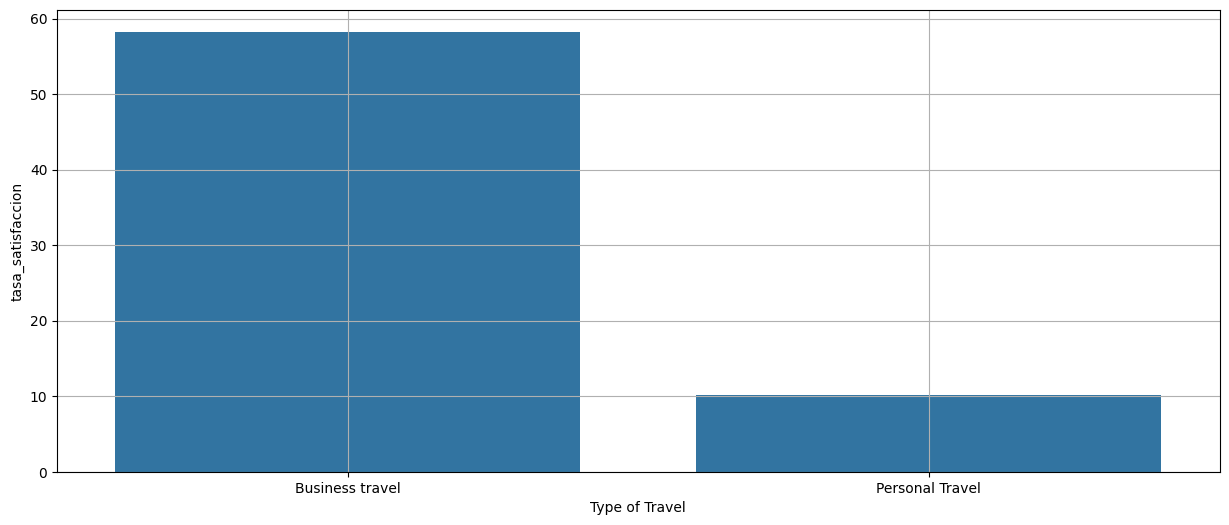

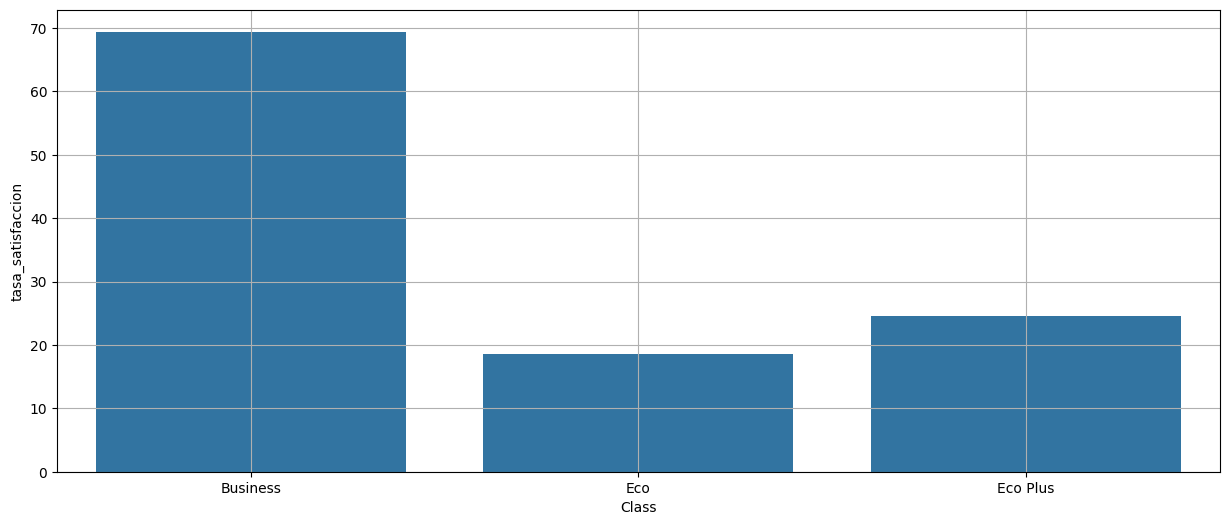

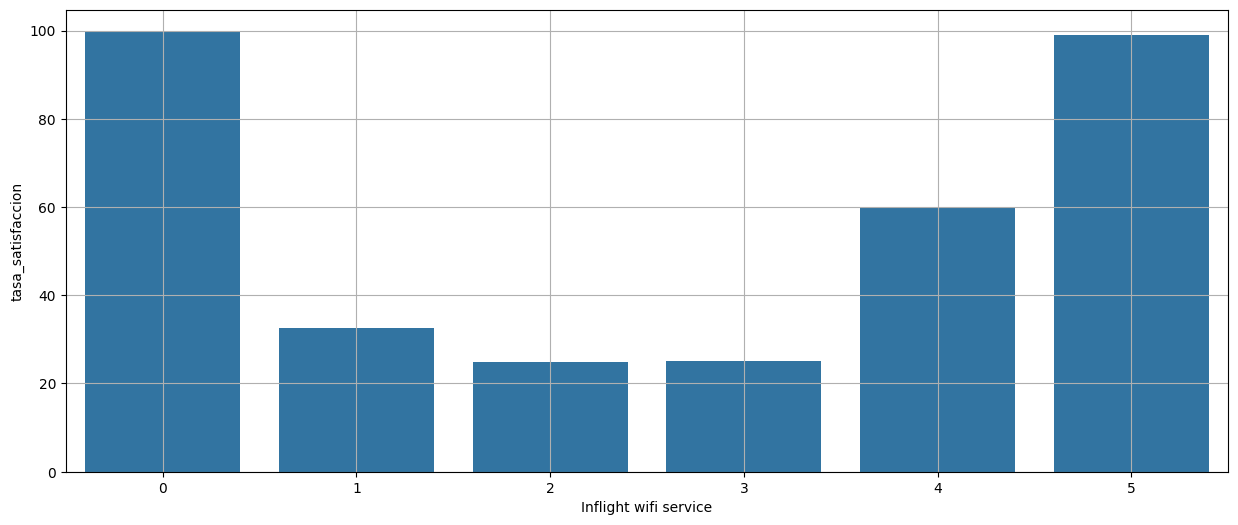

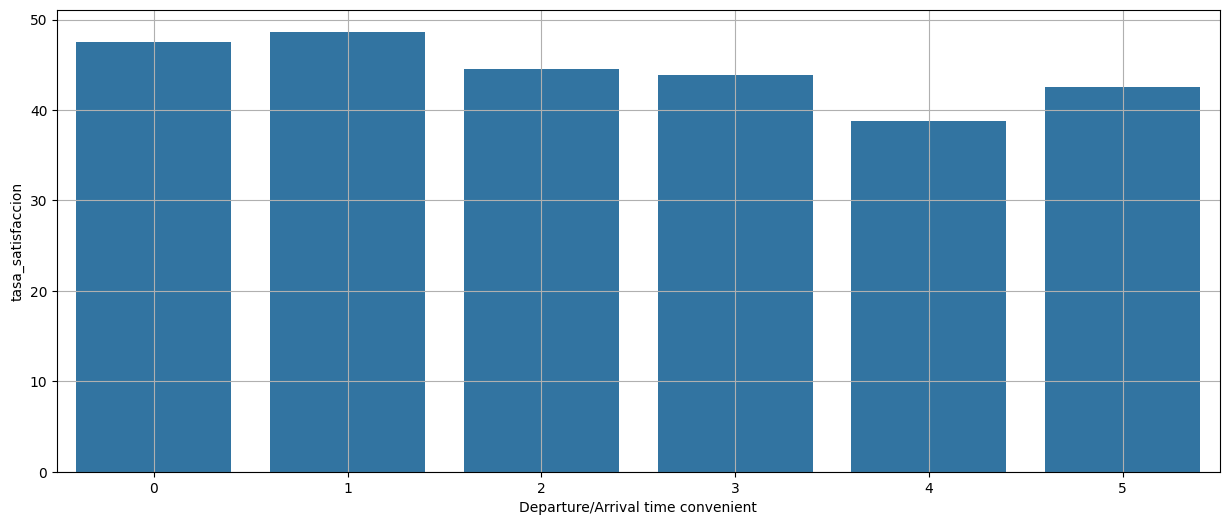

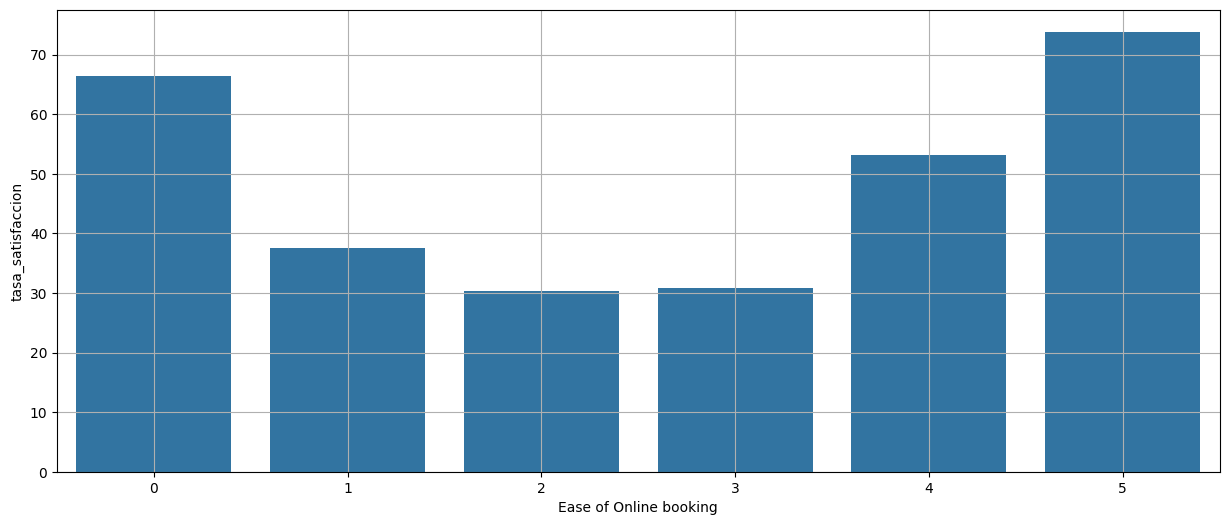

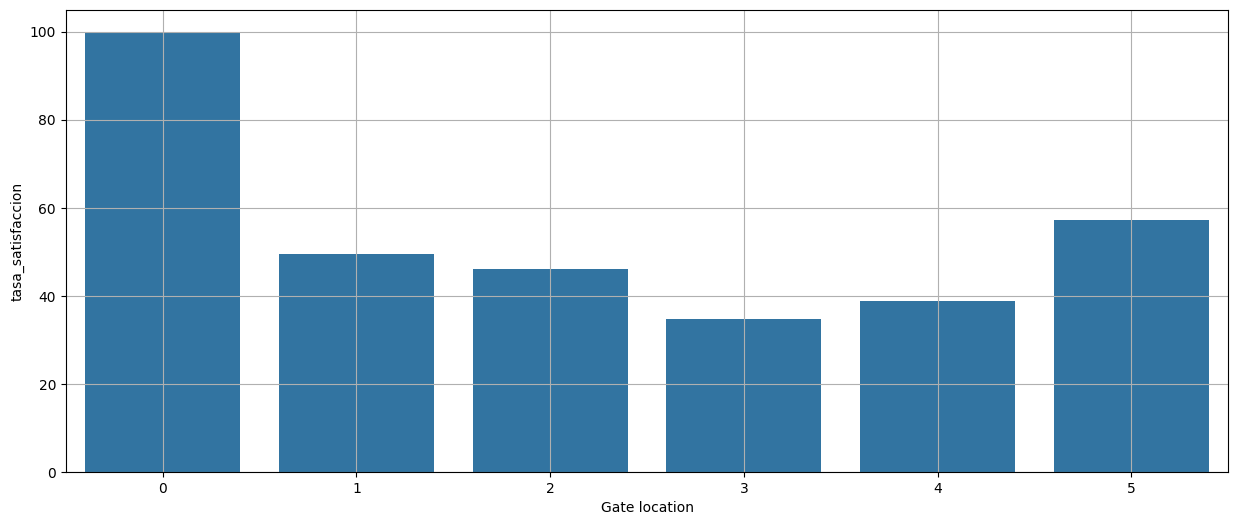

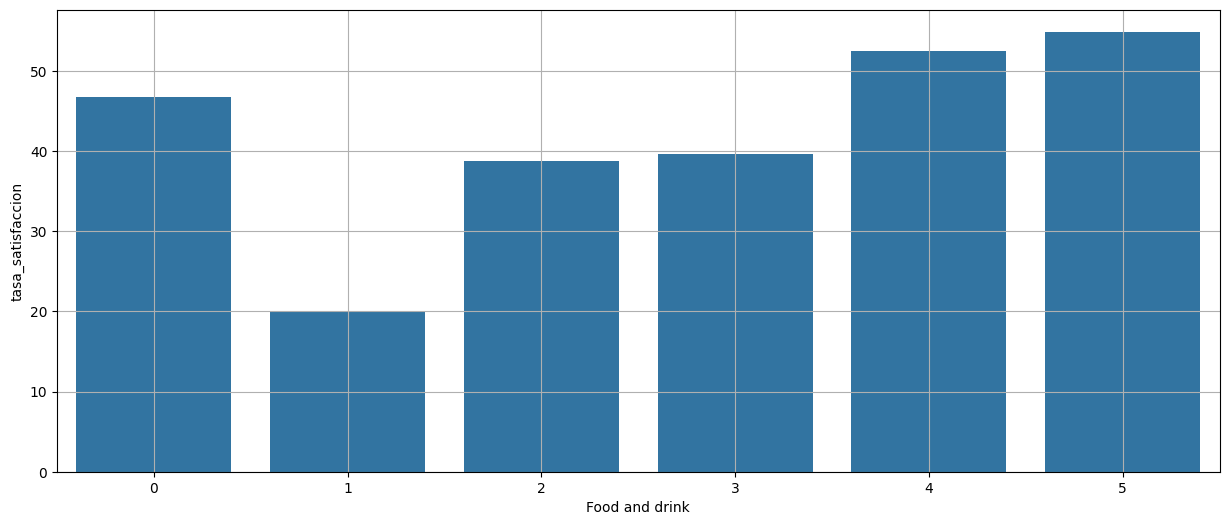

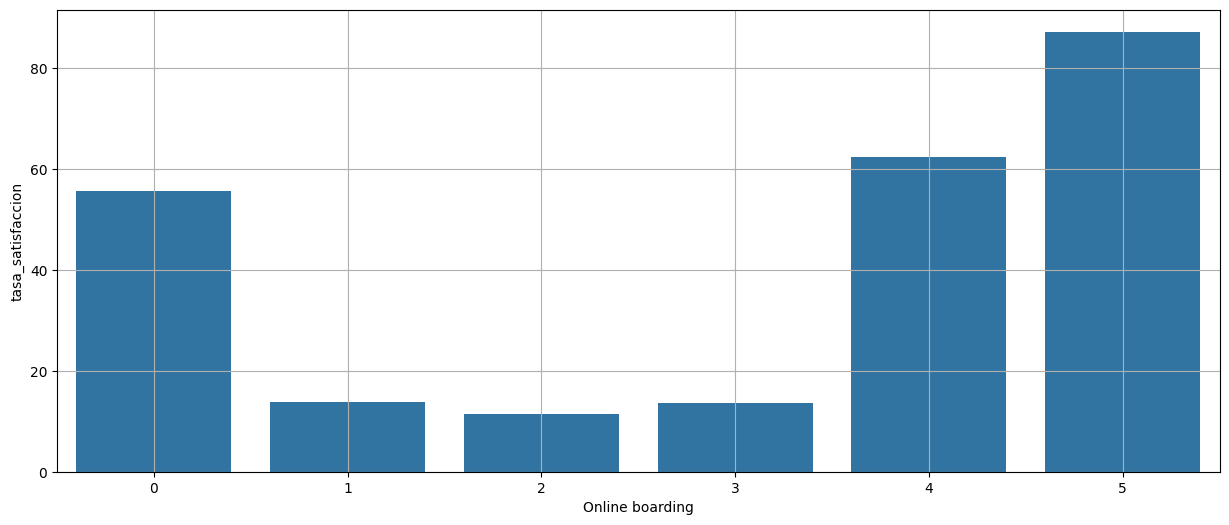

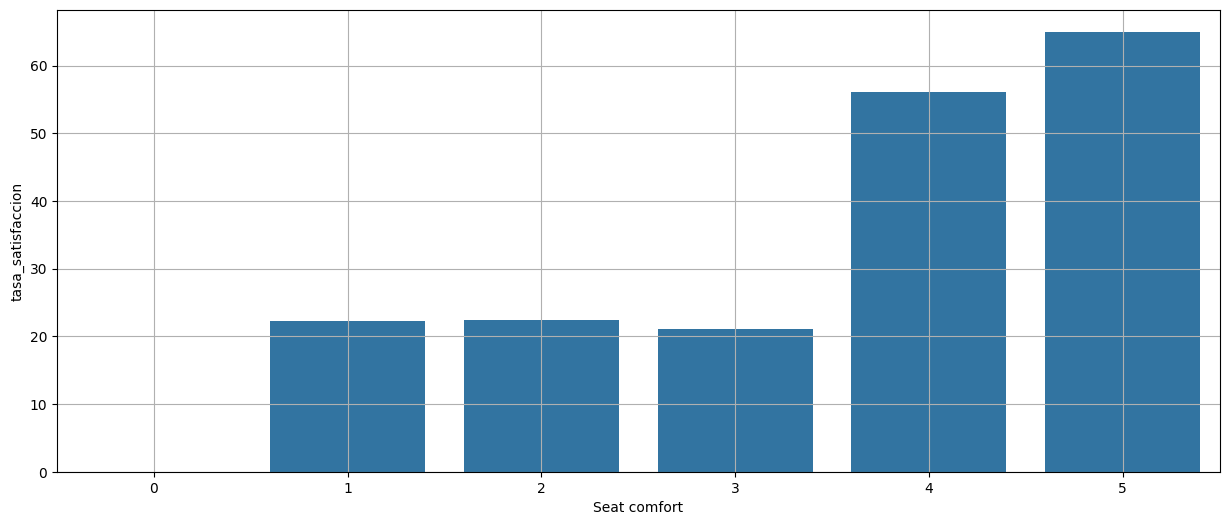

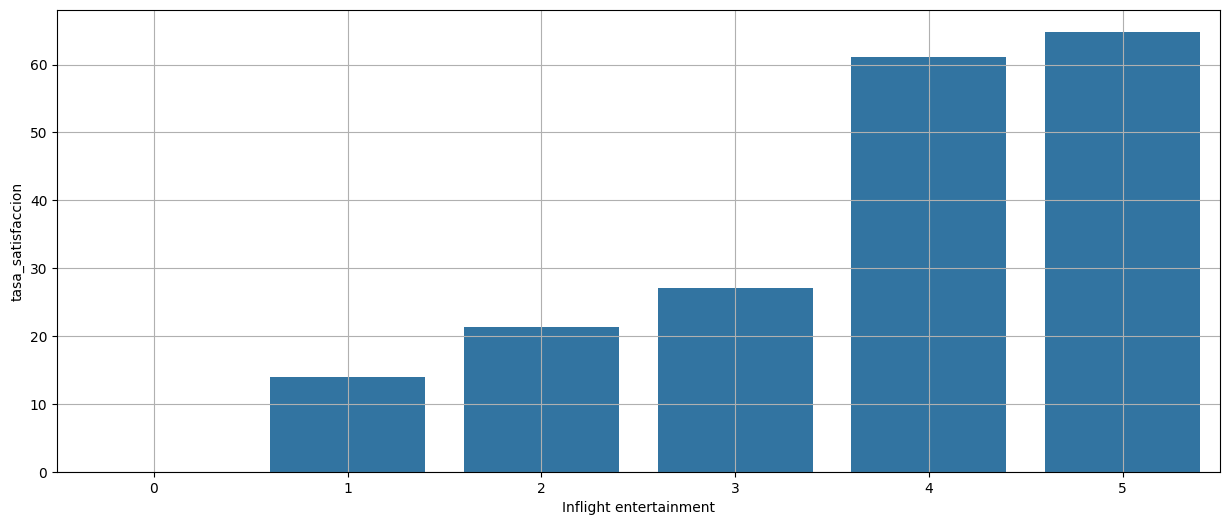

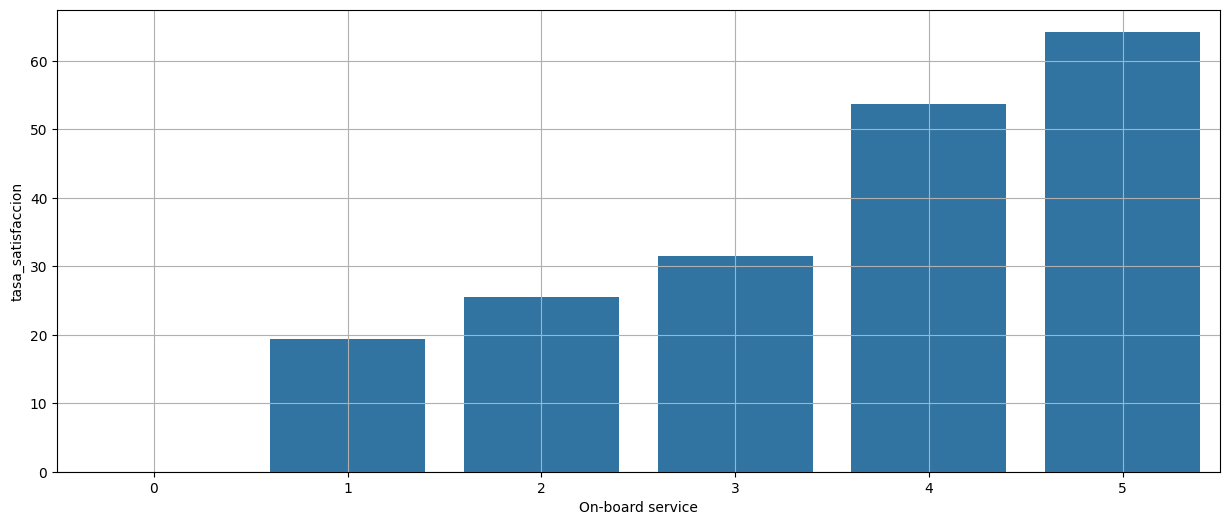

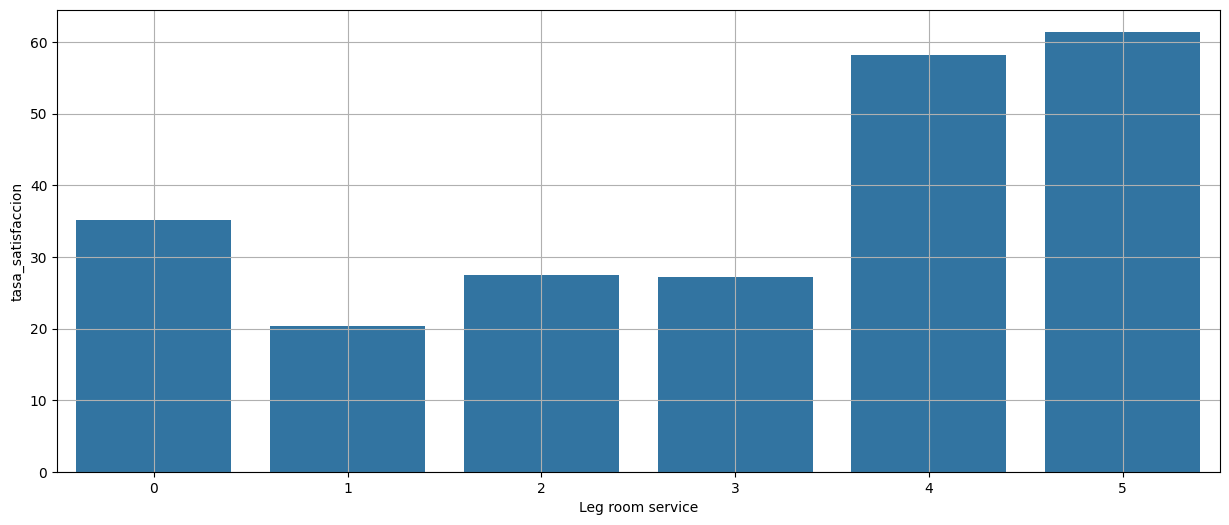

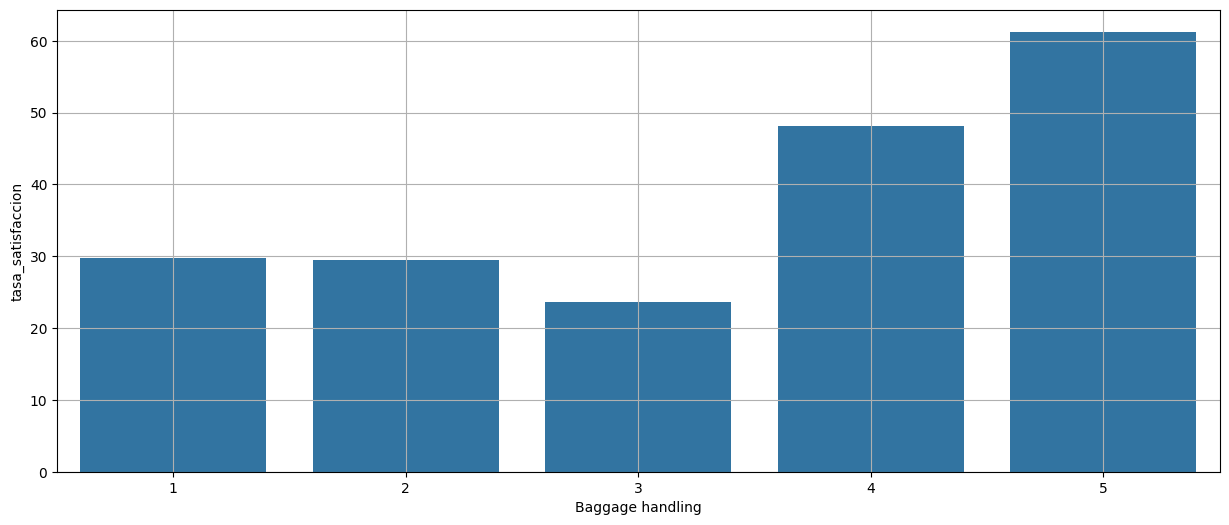

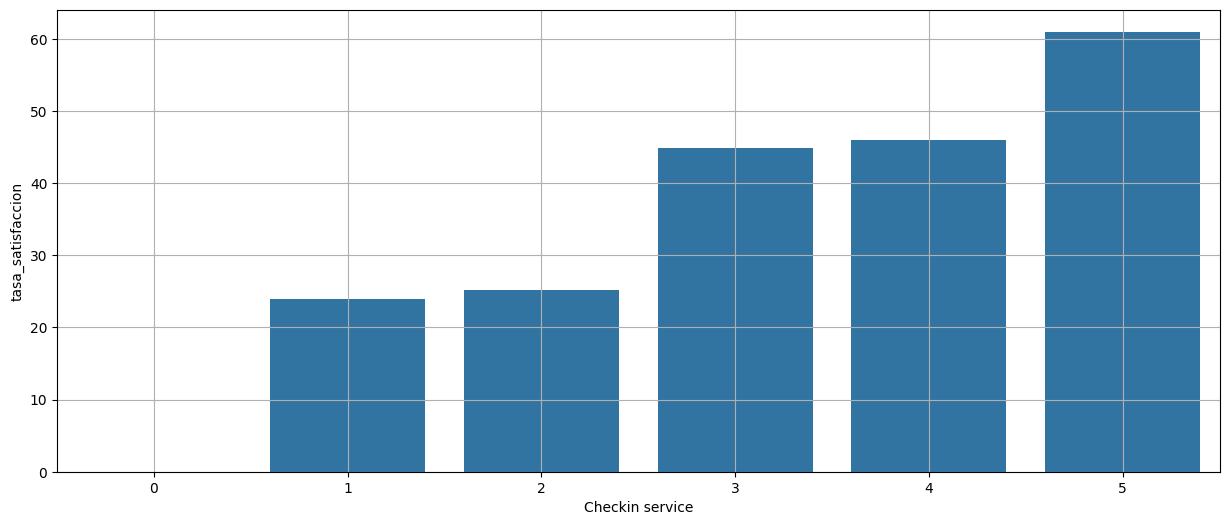

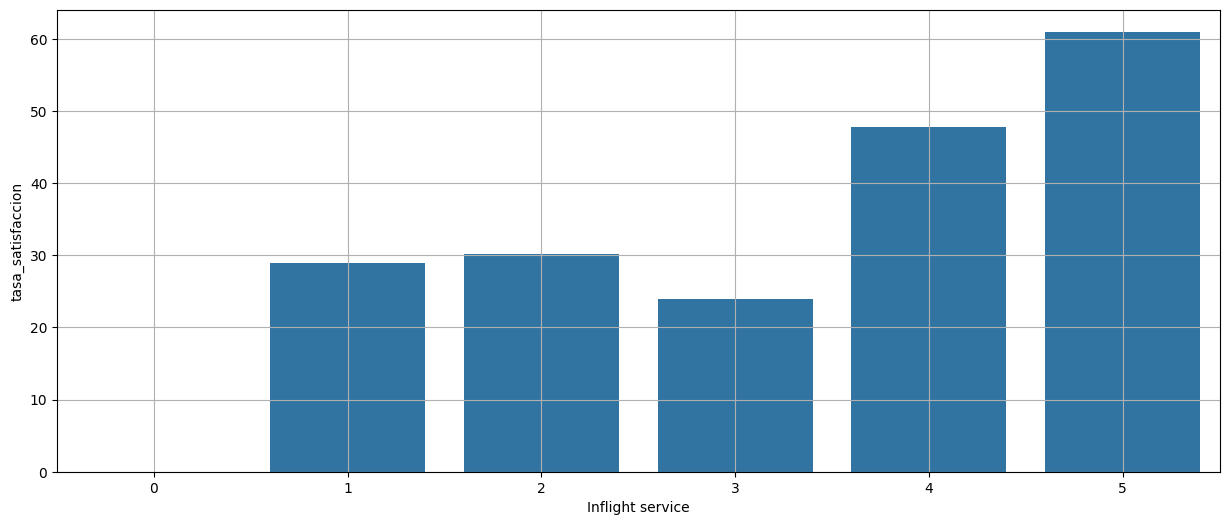

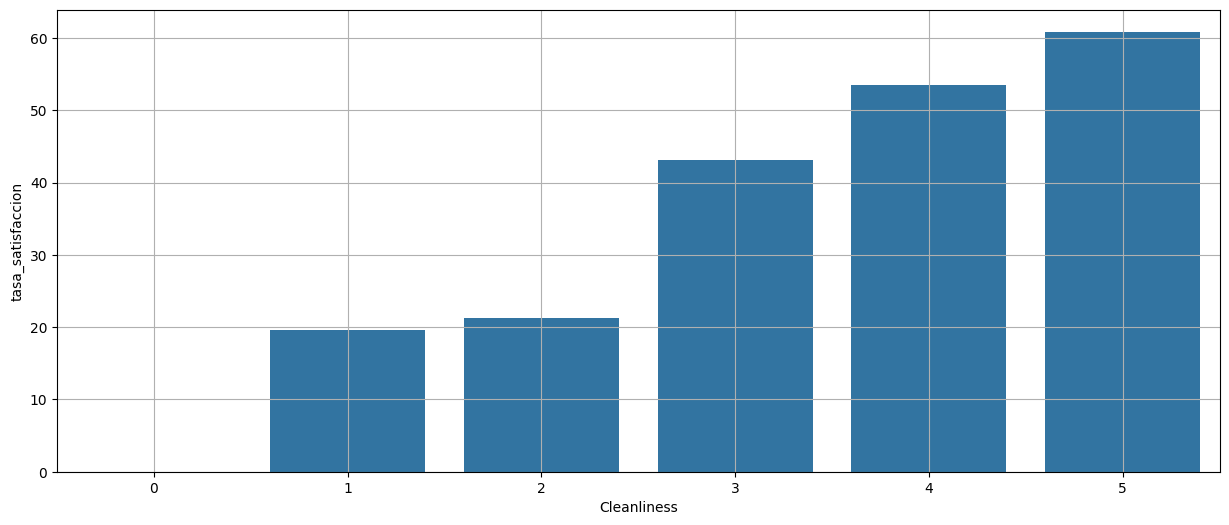

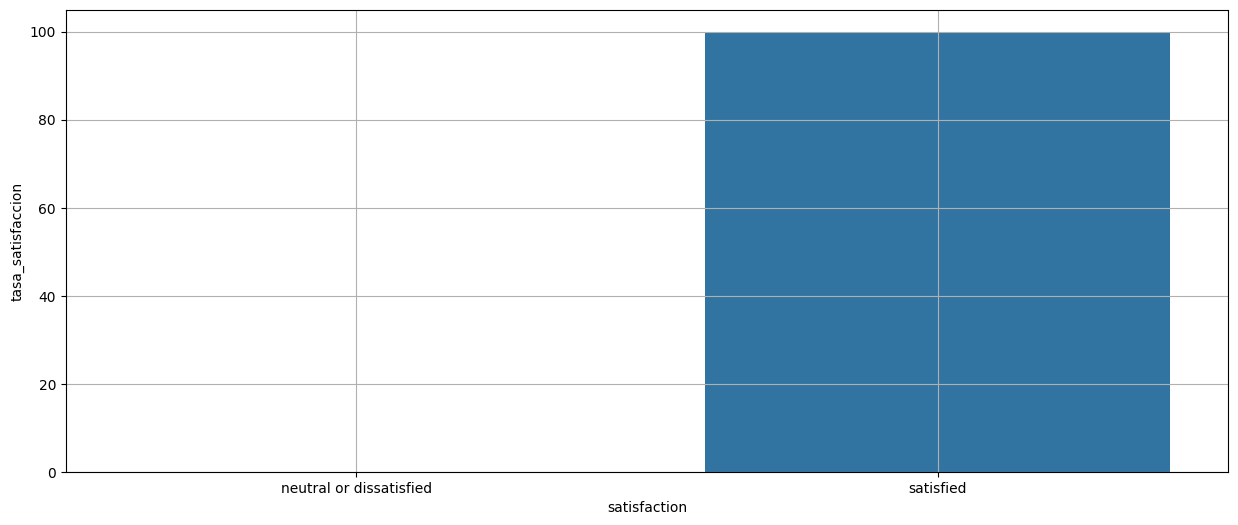

In [175]:
for col in cols_cat:
  graficar_tasa_satisfaccion(col, (col, 'satisfaction_bin'), type='bar')

**Observaciones:**
- En la variable de "Gender" no hay casi diferencia entre los subniveles, por lo que no parece ser una variable predictora.
- En la variable "Customer Type": "Loyal" 48% de tasa de satisfacción, "disloyal" 23%, **por lo que parece ser una variable predictora**.
- "Type of Travel": Business (58%), Personal (10%). **Por lo que parece ser una variable predictora clave**.
- "Class": Business (69%), Eco (19%), Eco Plus (24%). Podemos observar que conforme avanza el tipo de clase a una mejor, avanza la tasa de satisfacción, lo vemos claramnte en la tasa de satisfacción de la clase "Business". **Por lo que sería una variable predictora.**
- "Inflight wifi service" observamos que conforme avanza la satisfacción con este servicio, aumenta la tasa de satisfacción general, de una forma muy significativa, llegando a un 99% de satisfacción. **Por lo que es una variable predictora.**
- "Departur/Arrival time convinient", no tiene una diferencia significativa, por lo que no es una variable predictora.
- "Easy of Online booking", observamos que conforme avanza la satisfacción con este servicio aumenta la tasa de satisfacción general, entre el nivel 1-3 hay una tasa de entre 31 - 36%, el nivel 4 (53%), nivel 5 (74%). **Por lo que es una variable predictora.**
- "Gate location", no hay casi diferencia entre los subniveles, por lo que no parece ser una variable predictora.
- "Food and Drink", conforme avanza la satisfacción con este servicio aumenta la tasa de satisfacción general, nivel 1 (20%), niveles 2-3 (38-39%), niveles 4-5 (53-55%).**Por lo que parece ser una variable predictora.**
- "Online boarding", observamos que conforme avanza la satisfacción con este servicio, aumenta la tasa de satisfacción general, de una forma muy significativa, los niveles 1-3 están entre 10-15%n nivel 4 (64%), nivel 5 (88%).
**Por lo que es una variable predictora.**
- "Seat comfort", tambien representa una gran diferencia entre sus niveles, los niveles del 1 al 3 (22%), nivel 4 (56%), nivel 5 (65%). **Por lo que es una variable predictora.**
- "Inflight entertainment", también parece ser una variable influyente, observamos que conforme avanza la satisfacción con este servicio, aumenta la tasa de satisfacción general, de una forma bastante significativa, nivel 1 (13%), nivel 2 (21%), nivel 3 (27%), nivel 4 (61%), nivel 5 (65%). **Por lo que es una variable predictora.**
- "On- board service tiene más o menos el mismo avance que la anterior, **por lo que es una variable predictora.**
- "Leg room service", tiene un impacto diferenciador como el anterior, pasando de un 21% en el nivel 1, a un 63% en el nivel 5.
- "Baggage handling", si que tiene impacto, pero no tan significativo, ya que hay valores más altos en los niveles 1 y 2, que en el nivel 3, aunque luego si que aumente la satisfacción en los niveles 4 y 5. **Por lo que parece ser una variable predictora.**
- "Check in Service", también parece ser una variable influyente, observamos que conforme avanza la satisfacción con este servicio, aumenta la tasa de satisfacción general de una forma bastante significativa, pasando de un nivel 1 (24%) a un nivel 5 (62%). **Por lo que es una variable predictora.**
- "Inflight Service": si que tiene impacto, pero no tan significativo, ya que en los niveles 1 y 2, tenemos una tasa mayor que en el nivel 3, aunque luego esta tasa si que aumenta en el nivel 4 y 5. **Por lo que parece ser una variable predictora.**
- "Cleanliness": si que tiene un impacto significativo y conforme aumenta la satisfacción en esta variable, aumenta la satisfacción general. Nivel 1 (19%), nivel 5 (62%).

**Resumen**

Ordenamos la variables en función de la importancia en la predicción.

1. "inflight wifi service"
2. "class"
3. "Easy of Online booking"
4. "Type of Travel"
5. "Customer Type"
6. "Inflight entertainment"
7. "On board Service"
8. "Cleanliness"
9. "seat comfort"
10. "Check-in service"
11. "Food and Drink"
12. "Flight Distance"

### Análisis de correlación y relación entre variables



In [176]:
# Cramér's V
# Función para calcular el Cramér's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = scipy.stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(k, r) - 1)))

# Imprimir los resultados de Cramér's V para cada par de variables categóricas
print("\nCramér's V entre variables categóricas:")
for i, col1 in enumerate(cols_cat):
    for j, col2 in enumerate(cols_cat):
        if i < j:
            cv = cramers_v(df[col1], df[col2])
            print(f"{col1} vs {col2}: {cv:.4f}")


Cramér's V entre variables categóricas:
Gender vs Customer Type: 0.0317
Gender vs Type of Travel: 0.0069
Gender vs Class: 0.0132
Gender vs Inflight wifi service: 0.0107
Gender vs Departure/Arrival time convenient: 0.0110
Gender vs Ease of Online booking: 0.0092
Gender vs Gate location: 0.0100
Gender vs Food and drink: 0.0124
Gender vs Online boarding: 0.0445
Gender vs Seat comfort: 0.0354
Gender vs Inflight entertainment: 0.0089
Gender vs On-board service: 0.0227
Gender vs Leg room service: 0.0545
Gender vs Baggage handling: 0.0485
Gender vs Checkin service: 0.0131
Gender vs Inflight service: 0.0461
Gender vs Cleanliness: 0.0193
Gender vs satisfaction: 0.0122
Customer Type vs Type of Travel: 0.3083
Customer Type vs Class: 0.1235
Customer Type vs Inflight wifi service: 0.0375
Customer Type vs Departure/Arrival time convenient: 0.2927
Customer Type vs Ease of Online booking: 0.0553
Customer Type vs Gate location: 0.1253
Customer Type vs Food and drink: 0.0796
Customer Type vs Online boa

De todos estos datos me quedo con las correlaciones con la variable que más me interesa "satisfaction".

- Online boarding vs satisfaction: 0.6185
- Inflight wifi service vs satisfaction: 0.5255
- Class vs satisfaction: 0.5047
- Seat comfort vs satisfaction: 0.3894
- Inflight entertainment vs satisfaction: 0.4221
- Leg room service vs satisfaction: 0.3437
- On-board service vs satisfaction: 0.3328
- Cleanliness vs satisfaction: 0.3140
- Ease of Online booking vs satisfaction: 0.3165
- Baggage handling vs satisfaction: 0.2879
- Inflight service vs satisfaction: 0.2823
- Type of Travel vs satisfaction: 0.4490
- Customer Type vs satisfaction: 0.1876
- Gate location vs satisfaction: 0.1549
- Departure/Arrival time convenient vs satisfaction: 0.0659
- Checkin service vs satisfaction: 0.2486
- Food and drink vs satisfaction: 0.2238
- Gender vs satisfaction: 0.0122


1.  Poca o Ninguna Asociación (V ≈ 0):

No hay una relación significativa entre las variables.

- Gender vs satisfaction (0.0122)
- Departure/Arrival time convenient vs satisfaction: (0.0659)

2.  Asociación Débil (0 < V < 0.3):

La relación entre las variables es leve y no tiene un impacto fuerte en la satisfacción.

- Gate location vs satisfaction (0.1549)
- Customer Type vs satisfaction: (0.1876)
- Food and drink vs satisfaction (0.2238)
- Checkin service vs satisfaction (0.2486)
- Baggage handling vs satisfaction: (0.2879)
- Inflight service vs satisfaction: (0.2823)

3. Asociación Moderada (0.3 ≤ V < 0.5):

Existe una relación notable entre las variables, que tiene una influencia moderada en la satisfacción.

- Seat comfort vs satisfaction (0.3894)
- On-board service vs satisfaction: (0.3328)
- Inflight entertainment vs satisfaction (0.4221)
- Leg room service vs satisfaction (0.3437)
- Cleanliness vs satisfaction (0.3140)
- Ease of Online booking vs satisfaction (0.3165)
Type of Travel vs satisfaction: (0.4490)

4. Asociación Relativamente Fuerte (0.5 ≤ V < 0.7):

La relación es bastante fuerte y tiene una influencia significativa en la satisfacción.

- Online boarding vs satisfaction (0.6185)
- Inflight wifi service vs satisfaction (0.5255)
- Class vs satisfaction (0.5047)

5. Asociación Fuerte (V ≥ 0.7):

Hay una relación muy fuerte entre las variables, con un gran impacto en la satisfacción.
No hay ejemplos en nuestros datos que alcancen este nivel.

### Codificación de las variables categóricas:

In [178]:
from sklearn.preprocessing import LabelEncoder

# Aplicar Label Encoding
label_encoders = {}
for col in cols_cat:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

print("Comprobar el DataFrame después de la codificación")
print(df.head())

Comprobar el DataFrame después de la codificación
   Unnamed: 0      id  Gender  Customer Type   Age  Type of Travel  Class  \
0           0   70172       1              0  13.0               1      2   
1           1    5047       1              1  25.0               0      0   
2           2  110028       0              0  26.0               0      0   
3           3   24026       0              0  25.0               0      0   
4           4  119299       1              0  61.0               0      0   

   Flight Distance  Inflight wifi service  Departure/Arrival time convenient  \
0            460.0                      3                                  4   
1            235.0                      3                                  2   
2           1142.0                      2                                  2   
3            562.0                      2                                  5   
4            214.0                      3                                  3   

   ...

3. Reducción de Dimensionalidad (PCA)
Para reducir la dimensionalidad de los datos, reteniendo la mayor parte de la varianza.


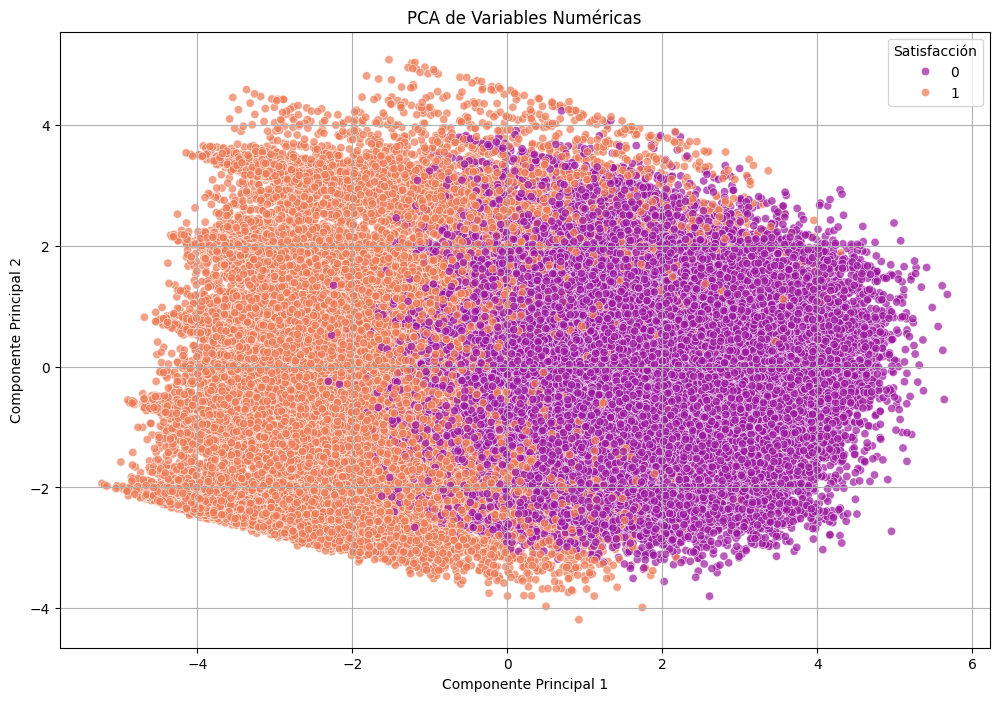

In [179]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar solo las columnas numéricas
cols_num = df.select_dtypes(include=[np.number]).columns

# Normalizar los datos
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[cols_num])

# Aplicar PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)

# Agregar los resultados del PCA al DataFrame
df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]

# Crear el gráfico de dispersión con color según la satisfacción
plt.figure(figsize=(12, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='satisfaction', data=df, palette='plasma', alpha=0.7)

# Configurar los títulos y etiquetas
plt.title('PCA de Variables Numéricas')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')

# Mostrar la leyenda y el gráfico
plt.legend(title='Satisfacción')
plt.grid(True)
plt.show()

4.2. Análisis bivariado - en Pares de Variables con Asociación Relativamente Fuerte:

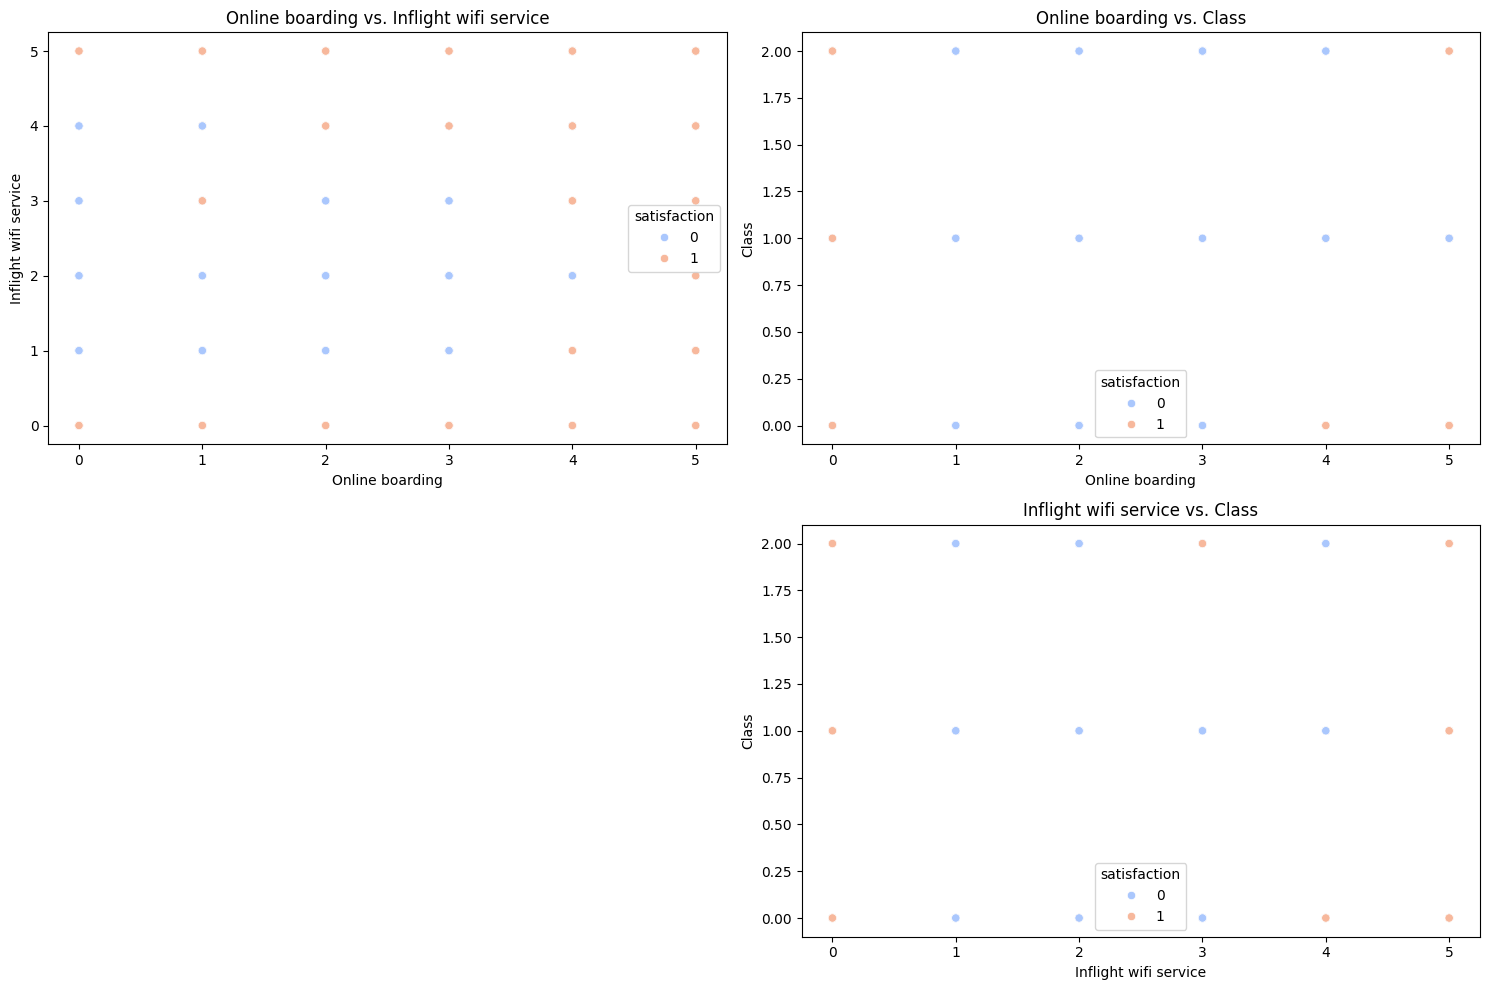

In [180]:
# Variables con asociación relativamente fuerte
variables_fuertes = ['Online boarding', 'Inflight wifi service', 'Class']

# Crear gráficos de dispersión para pares de variables
plt.figure(figsize=(15, 10))

for i in range(len(variables_fuertes)):
    for j in range(i+1, len(variables_fuertes)):
        var1 = variables_fuertes[i]
        var2 = variables_fuertes[j]

        # Crear subgráfico, adding 1 to the index calculation
        plt.subplot(len(variables_fuertes)-1, len(variables_fuertes)-1, i*(len(variables_fuertes)-1) + j)

        # Gráfico de dispersión para cada par
        sns.scatterplot(x=var1, y=var2, hue='satisfaction', data=df, palette='coolwarm')
        plt.title(f'{var1} vs. {var2}')
        plt.xlabel(var1)
        plt.ylabel(var2)

plt.tight_layout()
plt.show()